In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import sweetviz as sv
import pandas_profiling as pp

C:\Users\Dell\AppData\Local\Temp\ipykernel_13156\2163470704.py:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [5]:
cars = pd.read_csv('C:/Users/Dell/Desktop/ExcelR Assignments/Yash/MLR/ToyotaCorolla.csv')

In [6]:
cars.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [7]:
cars.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [8]:
cars.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [10]:
cars = cars.rename({'Age_08_04':'age', 'Quarterly_Tax':'Qtax'}, axis=1)
cars.head()

,Id,Model,Price,age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [12]:
cars_new = cars[['Price', 'age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Qtax', 'Weight']]
cars.head()

,Id,Model,Price,age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [13]:
cars_new.isna().sum()

Price     0
age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
Qtax      0
Weight    0
dtype: int64

In [16]:
cars_new[cars_new.duplicated()]

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [17]:
cars_new = cars_new.drop_duplicates().reset_index(drop=True)
cars_new[cars_new.duplicated()]

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight


In [18]:
cars_new.corr()

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Qtax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


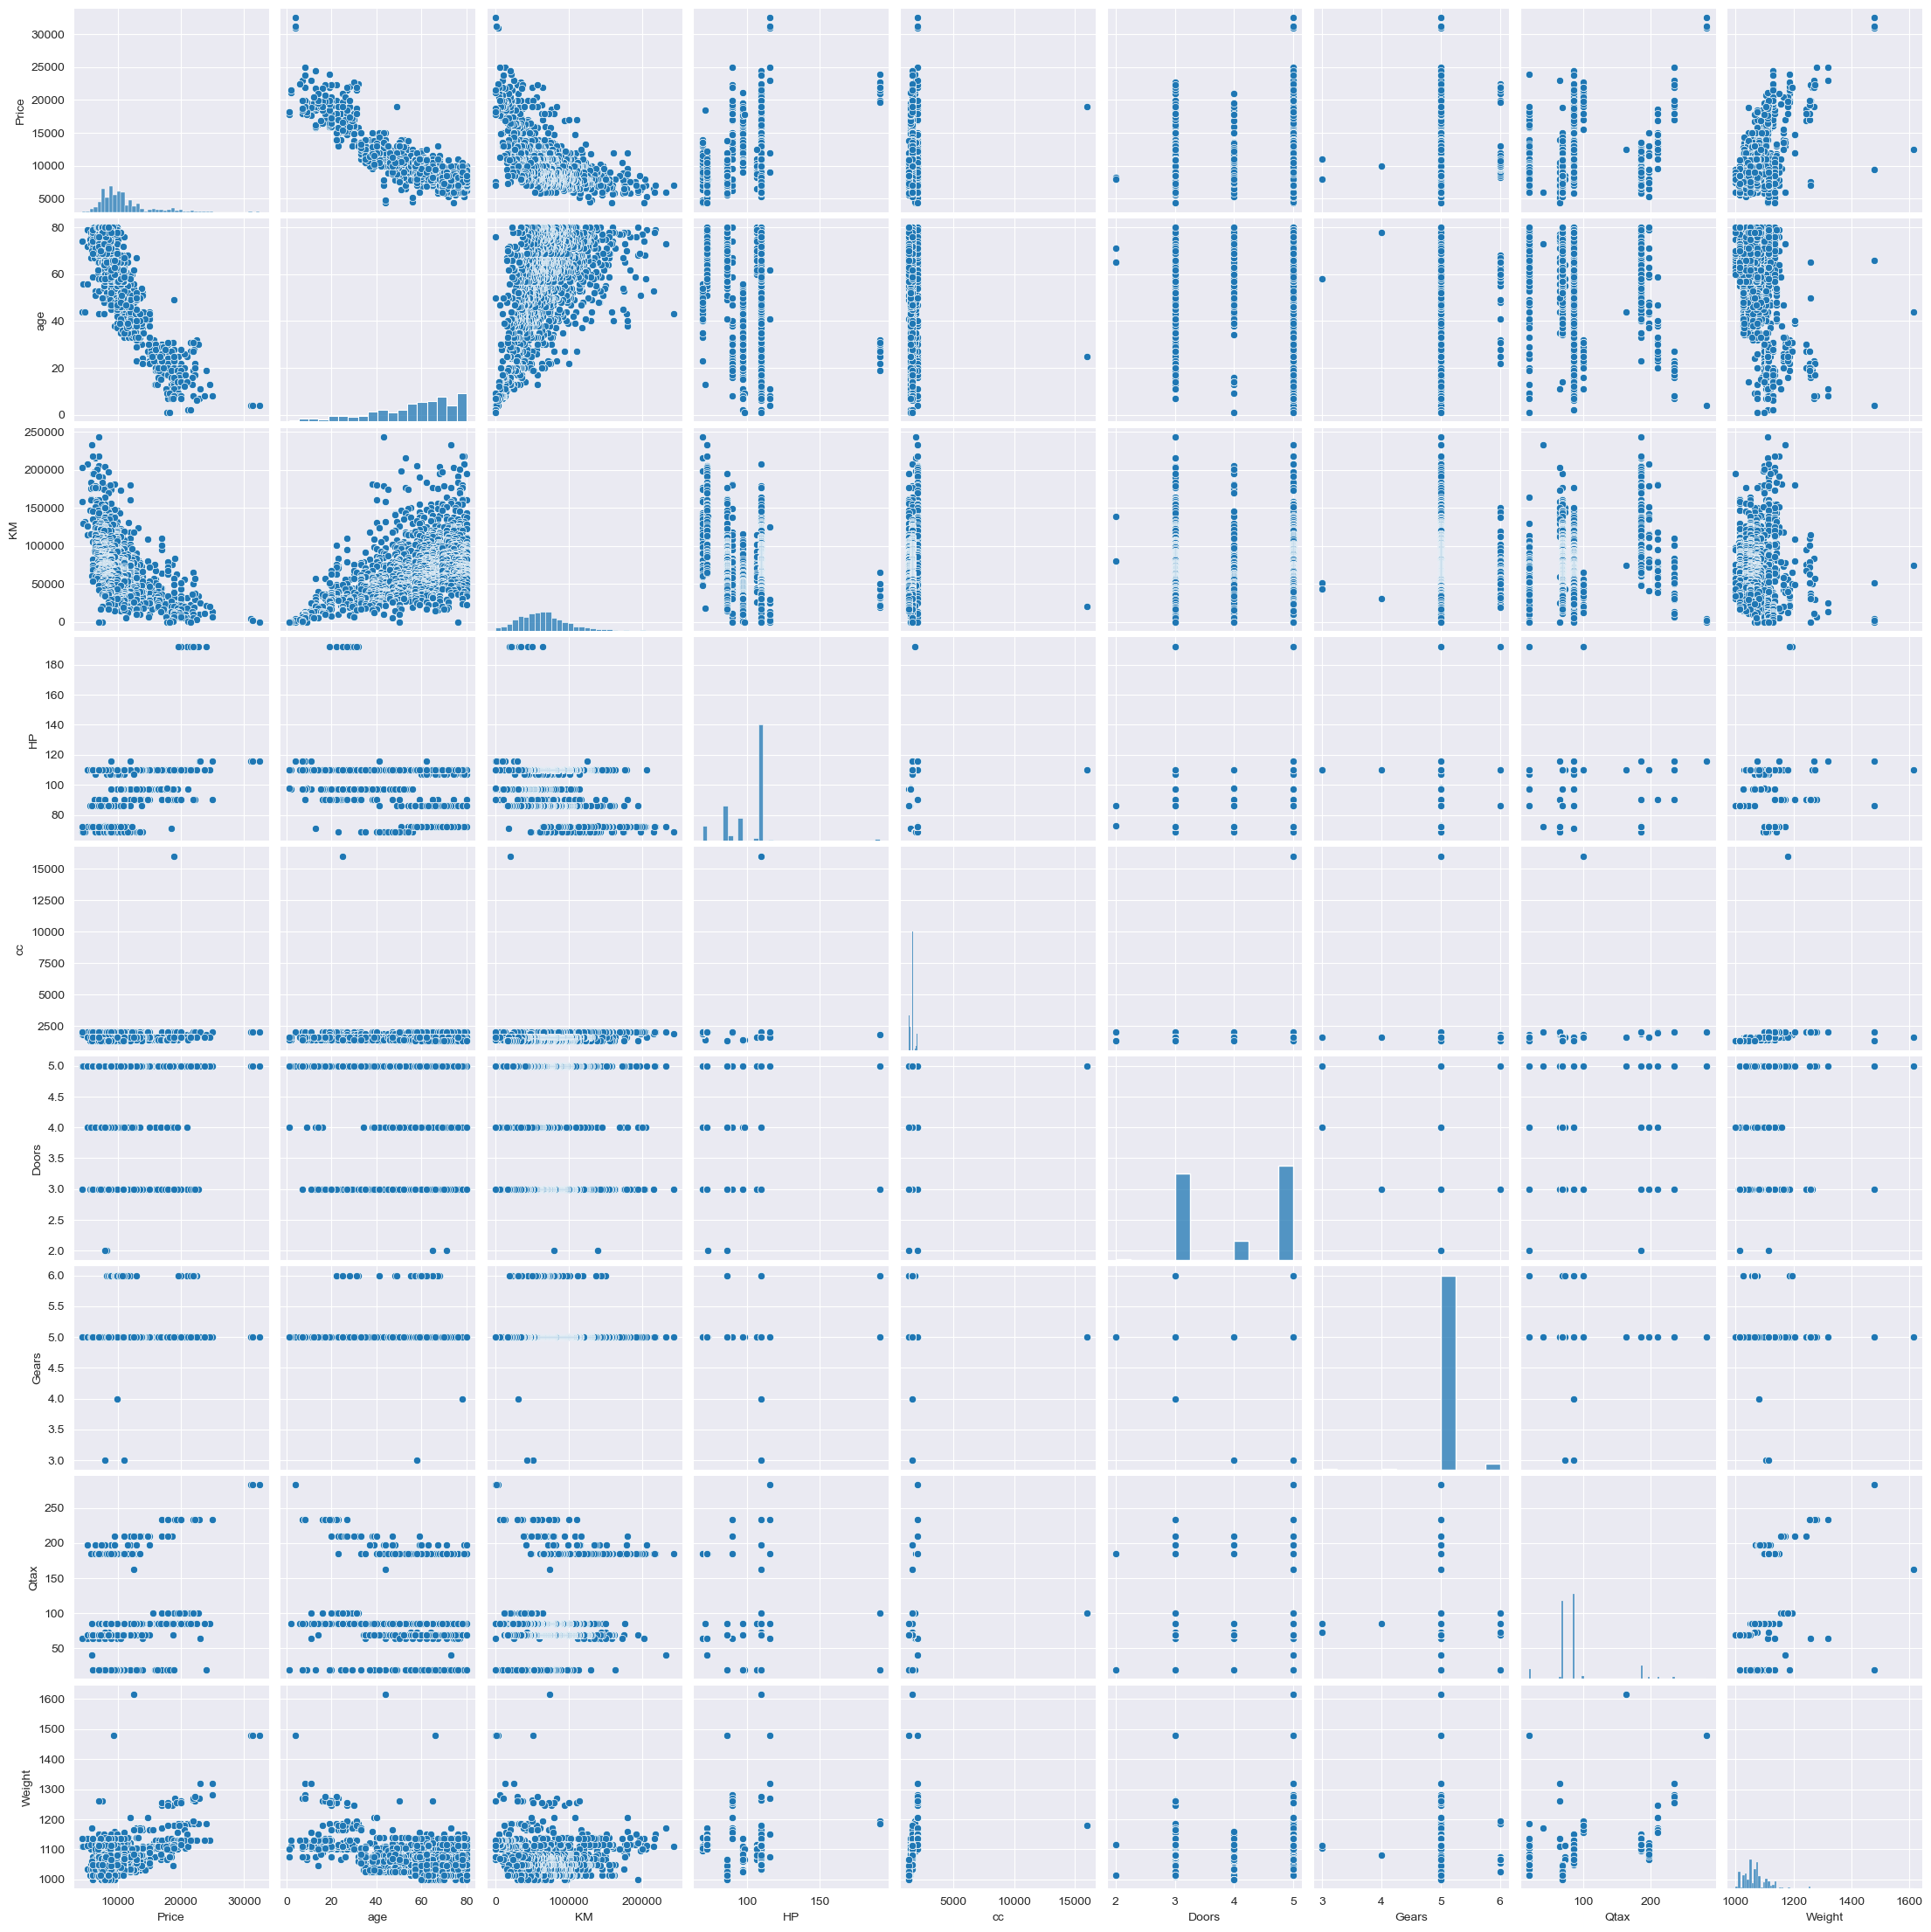

In [19]:
sns.set_style(style='darkgrid')
sns.pairplot(cars_new)

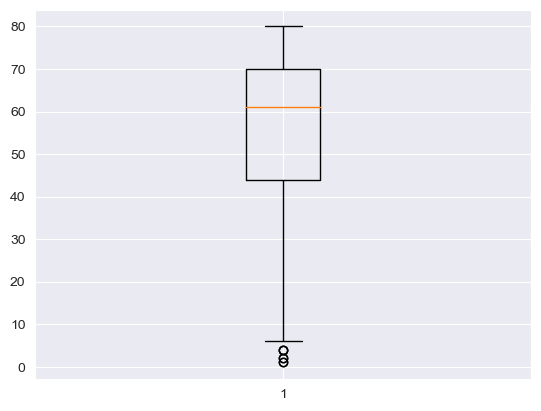

In [20]:
age=plt.boxplot(cars_new.age)
plt.show()

In [21]:
[item.get_ydata()[1] for item in age ['whiskers']]

[6.0, 80.0]

In [22]:
[item.get_ydata() for item in age ['fliers']]

[array([4, 4, 4, 2, 2, 1, 1], dtype=int64)]

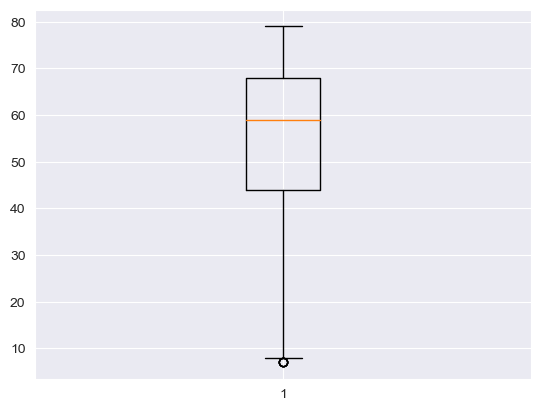

In [26]:
for i in cars_new ['age']:
    if i<=6 or i>=80:
        cars_new['age'] = cars_new['age'].replace(i, np.mean(cars_new['age']))
age1=plt.boxplot(cars_new.age)
plt.show()
    

In [27]:
[item.get_ydata() for item in age1['fliers']]

[array([7., 7., 7., 7., 7.])]

In [28]:
[item.get_ydata()[1] for item in age1['whiskers']]

[8.0, 79.0]

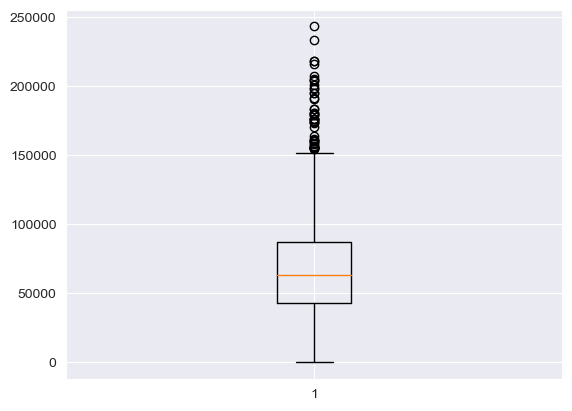

In [30]:
km=plt.boxplot(cars_new.KM)
plt.show()

In [31]:
[item.get_ydata() for item in km['fliers']]

[array([243000, 180638, 179860, 178858, 161000, 158320, 216000, 198167,
        176000, 174139, 174000, 205000, 204250, 194545, 190900, 183500,
        176184, 174833, 155720, 155500, 154783, 154462, 232940, 218118,
        217764, 207114, 203254, 200732, 197501, 194765, 191620, 183277,
        180378, 178800, 176177, 176000, 172980, 170000, 164000, 161775,
        160000, 159968, 159908, 158492, 156204, 156169, 155210, 155000,
        154900], dtype=int64)]

In [32]:
[item.get_ydata()[1] for item in km ['whiskers']]

[1.0, 151300.0]

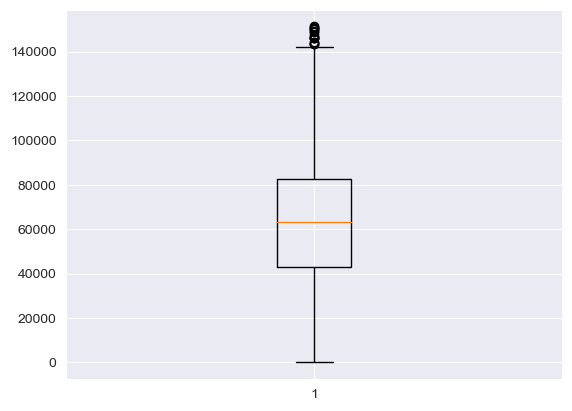

In [35]:
for i in cars_new['KM']:
    if i>151300:
        cars_new['KM'] = cars_new['KM'].replace(i,np.median(cars_new['KM']))
km1=plt.boxplot(cars_new.KM)
plt.show()

In [36]:
[item.get_ydata() for item in km1 ['fliers']]

[array([150000, 149329, 146736, 143513, 150585, 149000, 147636, 144521,
        144000, 151300, 151000, 150000, 146304, 146197, 145996, 143560],
       dtype=int64)]

In [37]:
[item.get_ydata()[1] for item in km1 ['whiskers']]

[1.0, 142130.0]

In [38]:
cars_new = cars_new[cars_new.KM<=142130]
cars_new

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight
0,13500,23.0,46986,90,2000,3,5,210,1165
1,13750,23.0,72937,90,2000,3,5,210,1165
2,13950,24.0,41711,90,2000,3,5,210,1165
3,14950,26.0,48000,90,2000,3,5,210,1165
4,13750,30.0,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69.0,20544,86,1300,3,5,69,1025
1431,10845,72.0,19000,86,1300,3,5,69,1015
1432,8500,71.0,17016,86,1300,3,5,69,1015
1433,7250,70.0,16916,86,1300,3,5,69,1015


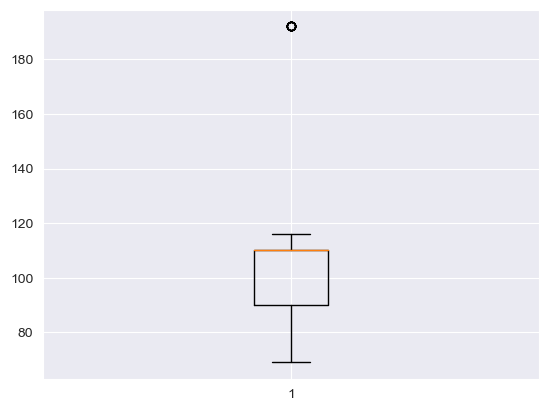

In [39]:
hp = plt.boxplot(cars_new.HP)
plt.show()

In [40]:
[item.get_ydata() for item in hp['fliers']]

[array([192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192], dtype=int64)]

In [41]:
{item.get_ydata()[1] for item in hp['whiskers']}

{69.0, 116.0}

C:\Users\Dell\AppData\Local\Temp\ipykernel_13156\1196820441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_new['HP'] = cars_new['HP'].replace(i, np.median(cars_new['HP']))


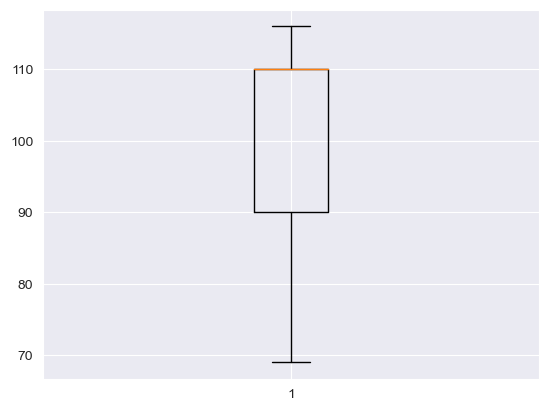

In [42]:
for i in cars_new['HP']:
    if i>116:
        cars_new['HP'] = cars_new['HP'].replace(i, np.median(cars_new['HP']))
plt.boxplot(cars_new['HP'])
plt.show()

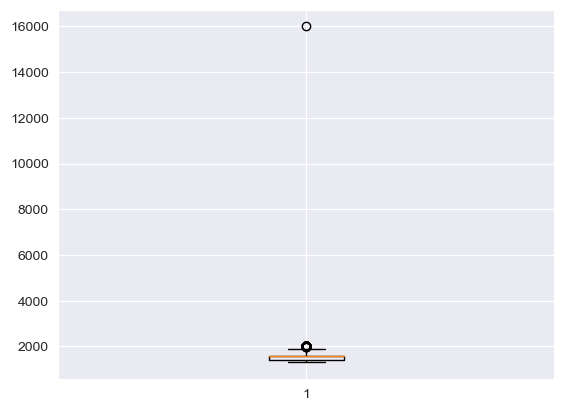

In [43]:
cc = plt.boxplot(cars_new.cc)
plt.show()

In [44]:
[item.get_ydata() for item in cc ['fliers'] ]

[array([ 2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000, 16000,  2000,  2000,
         2000,  1995,  1995,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  1975,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000], dtype=int64)]

In [45]:
[item.get_ydata()[1] for item in cc ['whiskers']]

[1300.0, 1900.0]

C:\Users\Dell\AppData\Local\Temp\ipykernel_13156\2634515094.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_new.cc = cars_new.cc.replace(i, np.median(cars_new.cc))


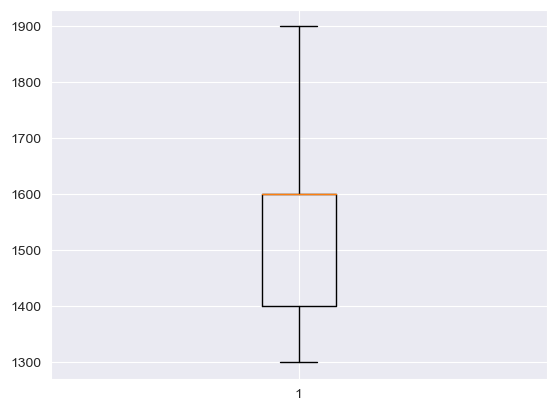

In [46]:
for i in cars_new.cc:
    if i>1900:
        cars_new.cc = cars_new.cc.replace(i, np.median(cars_new.cc))
plt.boxplot(cars_new.cc)
plt.show()

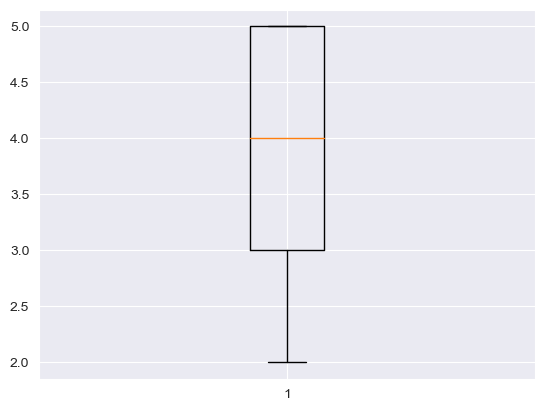

In [47]:
doors = plt.boxplot(cars_new.Doors)
plt.show()

In [49]:
[item.get_ydata() for item in doors['fliers']]

[array([], dtype=int64)]

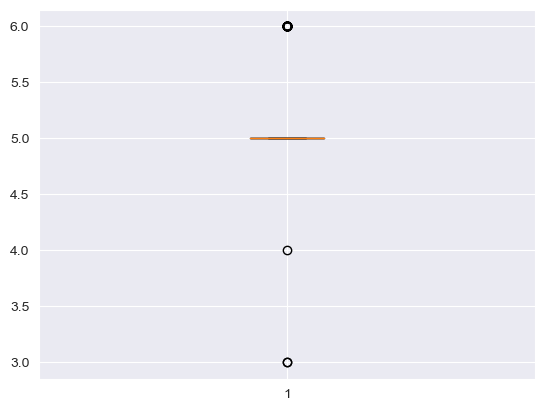

In [50]:
gears=plt.boxplot(cars_new.Gears)
plt.show()

In [51]:
[item.get_ydata() for item in gears['fliers']]

[array([3, 3, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       dtype=int64)]

In [52]:
[item.get_ydata()[1] for item in gears['whiskers']]

[5.0, 5.0]

C:\Users\Dell\AppData\Local\Temp\ipykernel_13156\3932548635.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_new.Gears = cars_new.Gears.replace(i,5)


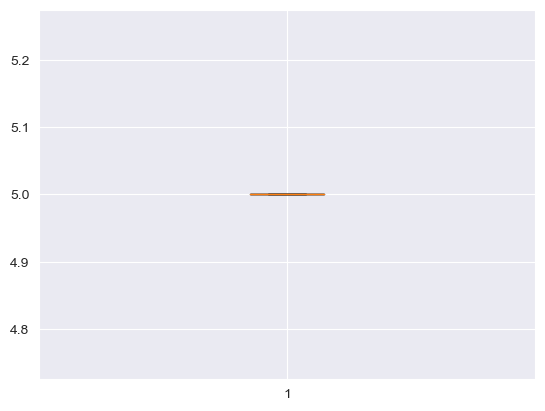

In [53]:
for i in cars_new.Gears:
    if i<5 or i>5:
        cars_new.Gears = cars_new.Gears.replace(i,5)
plt.boxplot(cars_new.Gears)
plt.show()

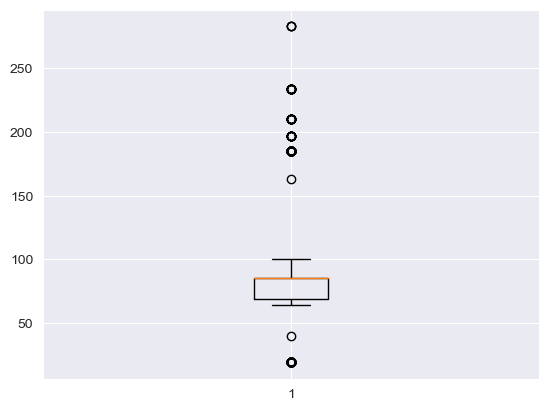

In [54]:
qtax = plt.boxplot(cars_new.Qtax)
plt.show()

In [43]:
[item.get_ydata() for item in qtax ['fliers']]

[array([ 19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,
         19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,
         19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,
         19,  19,  19,  19,  19,  19,  19,  19,  40,  19,  19,  19,  19,
         19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,
         19,  19,  19,  19,  19,  19,  19,  19, 210, 210, 210, 210, 210,
        210, 210, 210, 185, 234, 234, 234, 234, 234, 234, 234, 210, 234,
        234, 234, 234, 283, 283, 283, 234, 234, 234, 234, 234, 234, 234,
        185, 210, 210, 197, 185, 185, 185, 185, 210, 197, 185, 185, 197,
        185, 210, 210, 185, 163, 197, 210, 210, 185, 185, 197, 185, 185,
        185, 185, 185, 197, 185, 185, 185, 210, 185, 185, 185, 185, 185,
        185, 197, 185, 185, 185, 185, 185, 185, 185, 185, 185, 185, 185,
        185, 185, 185, 185, 185, 197, 197, 185, 185, 185, 185, 185, 185,
        185, 185, 185, 185, 185, 185, 185, 197, 197

In [55]:
[item.get_ydata()[1] for item in qtax['whiskers']]

[64.0, 100.0]

C:\Users\Dell\AppData\Local\Temp\ipykernel_13156\3098398225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_new.Qtax = cars_new.Qtax.replace(i,np.median(cars_new.Qtax))


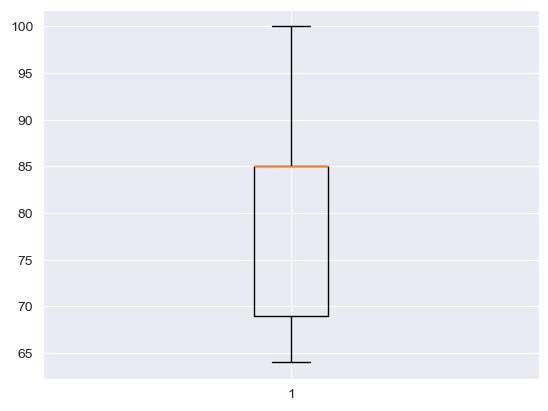

In [56]:
for i in cars_new.Qtax:
    if i<64 or i>100:
        cars_new.Qtax = cars_new.Qtax.replace(i,np.median(cars_new.Qtax))
plt.boxplot(cars_new.Qtax)
plt.show()

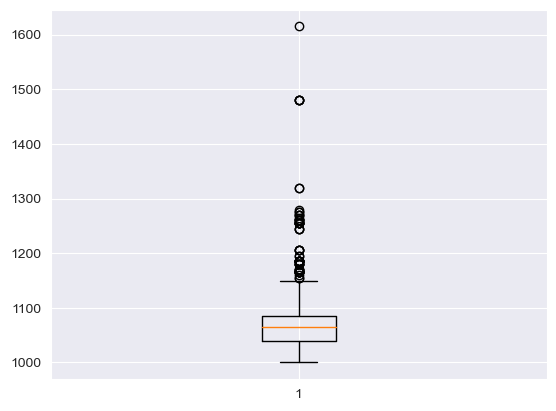

In [57]:
weight = plt.boxplot(cars_new.Weight)
plt.show()

In [58]:
[item.get_ydata() for item in weight['fliers']]

[array([1165, 1165, 1165, 1165, 1170, 1170, 1245, 1245, 1185, 1185, 1185,
        1185, 1185, 1185, 1185, 1185, 1170, 1255, 1255, 1270, 1255, 1255,
        1195, 1255, 1180, 1195, 1165, 1180, 1275, 1180, 1180, 1245, 1265,
        1260, 1260, 1260, 1155, 1480, 1480, 1480, 1320, 1270, 1280, 1270,
        1255, 1275, 1255, 1320, 1185, 1165, 1180, 1160, 1205, 1205, 1205,
        1170, 1615, 1165, 1205, 1165, 1260, 1260, 1155, 1480, 1172],
       dtype=int64)]

In [59]:
[item.get_ydata()[1] for item in weight['whiskers']]

[1000.0, 1150.0]

C:\Users\Dell\AppData\Local\Temp\ipykernel_13156\1580094328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_new.Weight = cars_new.Weight.replace(i,np.median(cars_new.Weight))


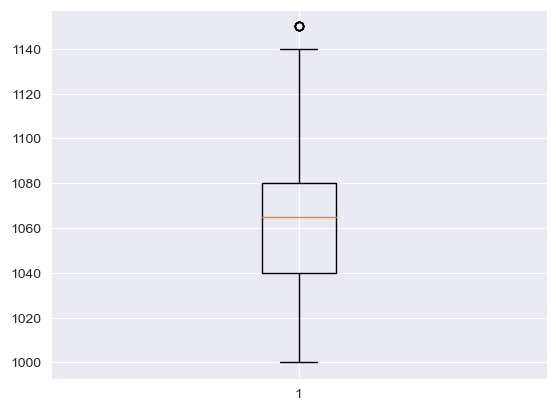

In [63]:
for i in cars_new.Weight:
    if i > 1150:
        cars_new.Weight = cars_new.Weight.replace(i,np.median(cars_new.Weight))
weight1 =plt.boxplot(cars_new.Weight)
plt.show()

In [64]:
[item.get_ydata() for item in weight1['fliers']]

[array([1150, 1150, 1150, 1150, 1150, 1150], dtype=int64)]

In [65]:
[item.get_ydata()[1] for item in weight1['whiskers'] ]

[1000.0, 1140.0]

In [66]:
cars_new = cars_new[cars_new.Weight<=1140]
cars_new

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight
0,13500,23.0,46986,90,1600,3,5,85,1065
1,13750,23.0,72937,90,1600,3,5,85,1065
2,13950,24.0,41711,90,1600,3,5,85,1065
3,14950,26.0,48000,90,1600,3,5,85,1065
4,13750,30.0,38500,90,1600,3,5,85,1065
...,...,...,...,...,...,...,...,...,...
1430,7500,69.0,20544,86,1300,3,5,69,1025
1431,10845,72.0,19000,86,1300,3,5,69,1015
1432,8500,71.0,17016,86,1300,3,5,69,1015
1433,7250,70.0,16916,86,1300,3,5,69,1015


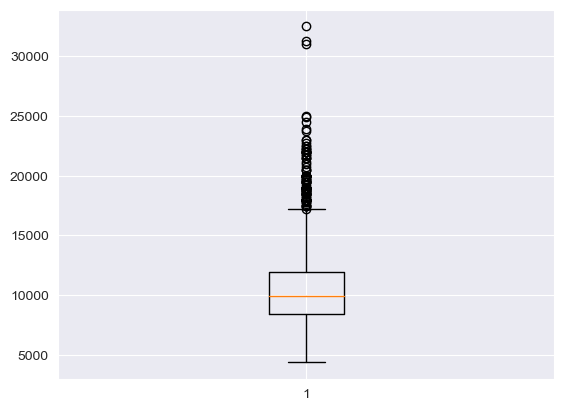

In [67]:
price = plt.boxplot(cars_new.Price)
plt.show()

In [68]:
[item.get_ydata() for item in price['fliers'] ]

[array([18600, 21500, 20950, 19950, 19600, 21500, 22500, 22000, 22750,
        17950, 17495, 17950, 19000, 17950, 17950, 21950, 17950, 20500,
        21950, 18950, 18750, 17950, 17950, 18950, 22250, 18950, 19950,
        18750, 18450, 18950, 17250, 17950, 17450, 17950, 21950, 22250,
        19950, 18900, 19950, 18750, 17450, 18990, 18500, 18500, 19450,
        18800, 17450, 17950, 32500, 31000, 31275, 24950, 22950, 24990,
        21950, 17900, 19250, 22250, 18950, 19950, 18950, 21750, 17950,
        18450, 23000, 19900, 23950, 19950, 18500, 18950, 20500, 24500,
        19450, 19950, 18450, 19500, 21750, 19500, 18900, 19750, 19750,
        18950, 20750, 19600, 19500, 17650, 19950, 19950, 20500, 17795,
        18245, 23750, 19500, 18950, 21950, 19950, 18950, 19950, 21950,
        22500, 18500, 18700, 21125, 21500, 17795, 18245, 18950],
       dtype=int64)]

In [69]:
[item.get_ydata()[1] for item in price['whiskers']]

[4350.0, 17200.0]

C:\Users\Dell\AppData\Local\Temp\ipykernel_13156\3242267609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_new.Price = cars_new.Price.replace(i, np.median(cars_new.Price))


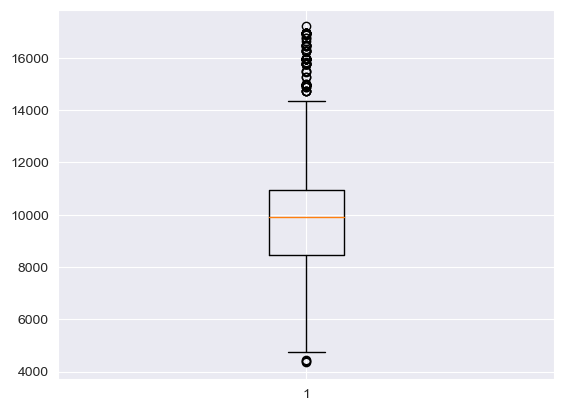

In [70]:
for i in cars_new.Price:
    if i > 17200:
        cars_new.Price = cars_new.Price.replace(i, np.median(cars_new.Price))
price1 = plt.boxplot(cars_new.Price)
plt.show()

In [71]:
[item.get_ydata() for item in price1['fliers']]

[array([ 4350,  4450,  4400, 14950, 16900, 16750, 16950, 15950, 16950,
        15950, 16950, 16250, 15950, 15750, 16950, 15750, 15950, 14950,
        15500, 15750, 15950, 14950, 15750, 14750, 16750, 16950, 16950,
        15800, 15750, 15500, 15250, 15250, 15999, 14950, 16500, 16950,
        14950, 15950, 15950, 15750, 16950, 16895, 14900, 15450, 16650,
        14900, 15950, 16450, 15950, 15950, 15950, 16250, 16950, 16350,
        16950, 15950, 16500, 15850, 16250, 15950, 16250, 15950, 16500,
        16500, 16250, 16450, 16450, 17200, 16868, 14750, 14750, 14950,
        14950, 14750, 14990, 14950, 14950, 14950, 14990], dtype=int64)]

In [72]:
[item.get_ydata()[1] for item in price1['whiskers']]

[4750.0, 14350.0]

In [73]:
cars_new = cars_new[cars_new.Price<=14350]
cars_new

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight
0,13500,23.0,46986,90,1600,3,5,85,1065
1,13750,23.0,72937,90,1600,3,5,85,1065
2,13950,24.0,41711,90,1600,3,5,85,1065
4,13750,30.0,38500,90,1600,3,5,85,1065
5,12950,32.0,61000,90,1600,3,5,85,1065
...,...,...,...,...,...,...,...,...,...
1430,7500,69.0,20544,86,1300,3,5,69,1025
1431,10845,72.0,19000,86,1300,3,5,69,1015
1432,8500,71.0,17016,86,1300,3,5,69,1015
1433,7250,70.0,16916,86,1300,3,5,69,1015


In [74]:
cars_new = cars_new[cars_new.Price>=4750]
cars_new

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight
0,13500,23.0,46986,90,1600,3,5,85,1065
1,13750,23.0,72937,90,1600,3,5,85,1065
2,13950,24.0,41711,90,1600,3,5,85,1065
4,13750,30.0,38500,90,1600,3,5,85,1065
5,12950,32.0,61000,90,1600,3,5,85,1065
...,...,...,...,...,...,...,...,...,...
1430,7500,69.0,20544,86,1300,3,5,69,1025
1431,10845,72.0,19000,86,1300,3,5,69,1015
1432,8500,71.0,17016,86,1300,3,5,69,1015
1433,7250,70.0,16916,86,1300,3,5,69,1015


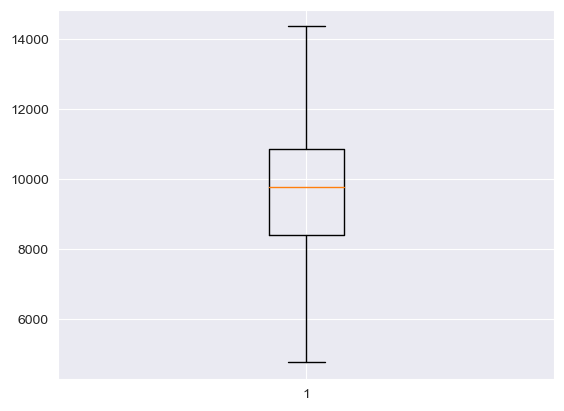

In [75]:
plt.boxplot(cars_new.Price)
plt.show()

In [76]:
cars_new.head(40)

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight
0,13500,23.0,46986,90,1600,3,5,85,1065
1,13750,23.0,72937,90,1600,3,5,85,1065
2,13950,24.0,41711,90,1600,3,5,85,1065
4,13750,30.0,38500,90,1600,3,5,85,1065
5,12950,32.0,61000,90,1600,3,5,85,1065
7,9900,30.0,75889,90,1600,3,5,85,1065
8,9900,27.0,19700,110,1800,3,5,100,1065
9,12950,23.0,71138,69,1900,3,5,85,1105
10,9900,25.0,31461,110,1800,3,5,100,1065
11,9900,22.0,43610,110,1800,3,5,100,1065


In [77]:
cars_new.reset_index(inplace=True,drop=True) #reset index witout assigning to the new column 
cars_new

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight
0,13500,23.0,46986,90,1600,3,5,85,1065
1,13750,23.0,72937,90,1600,3,5,85,1065
2,13950,24.0,41711,90,1600,3,5,85,1065
3,13750,30.0,38500,90,1600,3,5,85,1065
4,12950,32.0,61000,90,1600,3,5,85,1065
...,...,...,...,...,...,...,...,...,...
1329,7500,69.0,20544,86,1300,3,5,69,1025
1330,10845,72.0,19000,86,1300,3,5,69,1015
1331,8500,71.0,17016,86,1300,3,5,69,1015
1332,7250,70.0,16916,86,1300,3,5,69,1015


In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cars_scaled = scaler.fit_transform(cars_new.iloc[:,:])

In [79]:
cars_scaled

array([[ 2.14632676, -2.07632019, -0.61483015, ...,  0.        ,
         0.80194251,  0.10172947],
       [ 2.28546881, -2.07632019,  0.27008378, ...,  0.        ,
         0.80194251,  0.10172947],
       [ 2.39678245, -2.01506656, -0.79470456, ...,  0.        ,
         0.80194251,  0.10172947],
       ...,
       [-0.63651415,  0.86385422, -1.63678963, ...,  0.        ,
        -1.12344117, -1.47772944],
       [-1.33222438,  0.80260059, -1.64019957, ...,  0.        ,
        -1.12344117, -1.47772944],
       [-1.49919484,  1.17012239, -2.21699118, ...,  0.        ,
         0.80194251,  1.6495992 ]])

In [80]:
model= smf.ols('Price~age+KM+HP+cc+Doors+Gears+Qtax+Weight', data=cars_new).fit()

In [81]:
model.params

Intercept     678.690381
age           -52.621911
KM             -0.008514
HP              9.131743
cc              1.471915
Doors         219.719221
Gears        3393.451907
Qtax           20.640545
Weight         -9.546863
dtype: float64

In [82]:
model.tvalues,np.round(model.pvalues, 5)

(Intercept     9.272884
 age         -17.849246
 KM           -5.285426
 HP            2.354698
 cc            3.226056
 Doors         4.426731
 Gears         9.272884
 Qtax          3.031196
 Weight       -4.306359
 dtype: float64,
 Intercept    0.00000
 age          0.00000
 KM           0.00000
 HP           0.01868
 cc           0.00129
 Doors        0.00001
 Gears        0.00000
 Qtax         0.00248
 Weight       0.00002
 dtype: float64)

In [83]:
model.rsquared, model.rsquared_adj

(0.38260064749718437, 0.37934137489724495)

In [84]:
cars_new.corr()

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight
Price,1.000000,-0.573075,-0.395429,0.221196,0.179429,0.190022,NaN,0.261256,0.164206
age,-0.573075,1.000000,0.502175,-0.112767,-0.192802,-0.146814,NaN,-0.309008,-0.298009
KM,-0.395429,0.502175,1.000000,-0.180381,0.066754,-0.033242,NaN,-0.089996,-0.001925
HP,0.221196,-0.112767,-0.180381,1.000000,0.417602,0.158696,NaN,0.200967,0.038017
cc,0.179429,-0.192802,0.066754,0.417602,1.000000,0.169742,NaN,0.464031,0.627841
Doors,0.190022,-0.146814,-0.033242,0.158696,0.169742,1.000000,NaN,0.477425,0.450681
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Qtax,0.261256,-0.309008,-0.089996,0.200967,0.464031,0.477425,NaN,1.000000,0.680945
Weight,0.164206,-0.298009,-0.001925,0.038017,0.627841,0.450681,NaN,0.680945,1.000000


In [71]:
# As we can see after imputing the outliers with the median model is not performing well, 
# So we are going to try to build the model by deleting the outliers from the dataset 


In [85]:
cars.head(5)

,Id,Model,Price,age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [86]:
car1 = cars[['Price', 'age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Qtax', 'Weight']]
car1

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


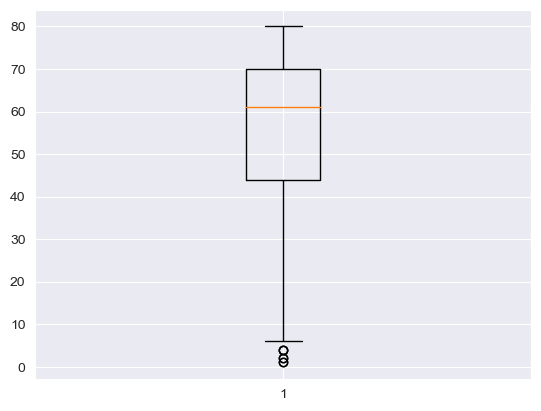

In [87]:
Age=plt.boxplot(car1.age)
plt.show()

In [88]:
[item.get_ydata() for item in Age ['fliers']]

[array([4, 4, 4, 2, 2, 1, 1], dtype=int64)]

In [89]:
[item.get_ydata()[1] for item in Age['whiskers']]

[6.0, 80.0]

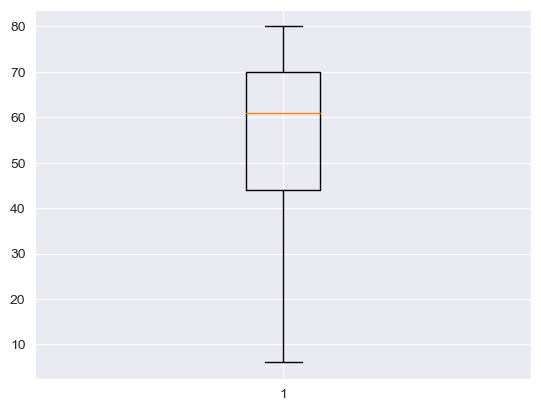

In [90]:
car1 = car1[car1.age>=6]
car1
plt.boxplot(car1.age)
plt.show()

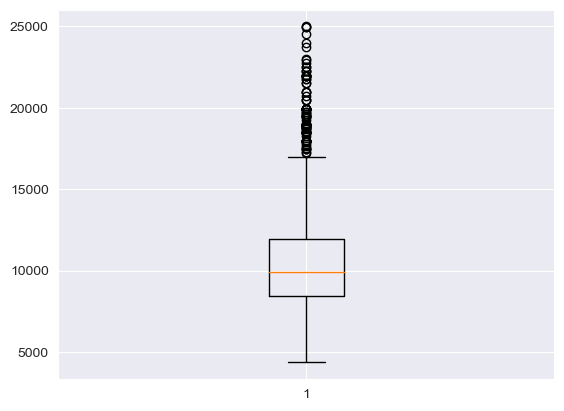

In [91]:
Price = plt.boxplot(car1.Price)
plt.show()

In [92]:
[item.get_ydata() for item in Price ['fliers']]

[array([18600, 21500, 20950, 19950, 19600, 21500, 22500, 22000, 22750,
        17950, 17495, 17950, 19000, 17950, 17950, 21950, 17950, 20500,
        21950, 18950, 18750, 17950, 17950, 18950, 22250, 18950, 19950,
        18750, 18450, 18950, 17250, 17950, 17450, 17950, 21950, 22250,
        19950, 18900, 19950, 18750, 17450, 18990, 18500, 18500, 19450,
        18800, 17450, 17950, 24950, 24950, 22950, 24990, 21950, 17900,
        19250, 22250, 18950, 19950, 18950, 21750, 17950, 18450, 23000,
        19900, 23950, 19950, 18500, 18950, 20500, 24500, 19450, 20950,
        17200, 19950, 18450, 19500, 21750, 19500, 18900, 19750, 19750,
        18950, 20750, 19600, 19500, 17650, 19950, 19950, 20950, 20500,
        17795, 18245, 23750, 19500, 18950, 21950, 19950, 18950, 19950,
        21950, 22500, 18500, 18700, 18950], dtype=int64)]

In [93]:
[item.get_ydata()[1] for item in Price ['whiskers']]

[4350.0, 16950.0]

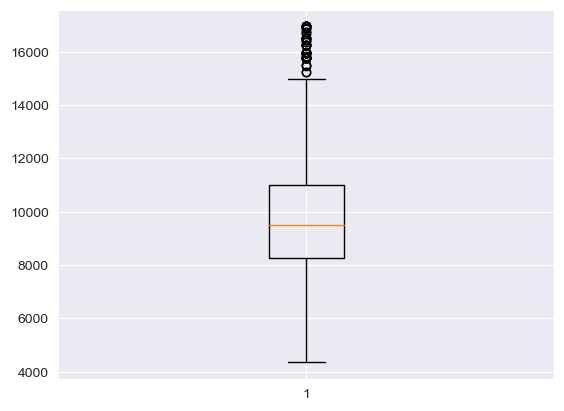

In [94]:
#After removing outliers 
car1 = car1[car1.Price<=16950]
car1
plt.boxplot(car1.Price)
plt.show()

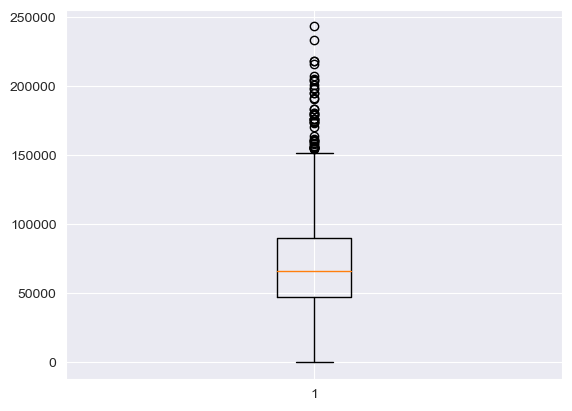

In [95]:
KM = plt.boxplot(car1.KM)
plt.show()

In [96]:
[item.get_ydata() for item in KM ['fliers']]

[array([243000, 180638, 179860, 178858, 161000, 158320, 216000, 198167,
        176000, 174139, 174000, 205000, 204250, 194545, 190900, 183500,
        176184, 174833, 155720, 155500, 154783, 154462, 232940, 218118,
        217764, 207114, 203254, 200732, 197501, 194765, 191620, 183277,
        180378, 178800, 176177, 176000, 172980, 170000, 164000, 161775,
        160000, 159968, 159908, 158492, 156204, 156169, 155210, 155000,
        154900], dtype=int64)]

In [97]:
[item.get_ydata()[1] for item in KM ['whiskers']]

[1.0, 151300.0]

In [98]:
car1=car1[car1.KM<=151300]
car1

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


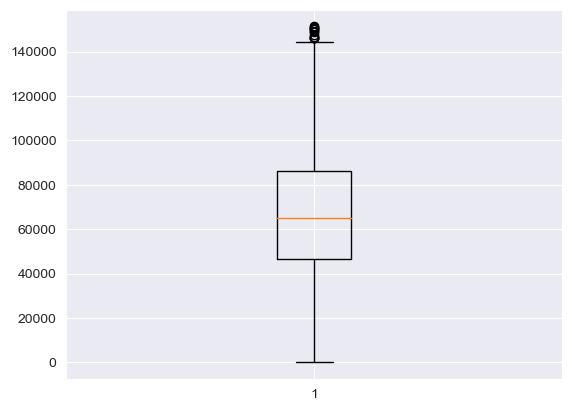

In [99]:
plt.boxplot(car1.KM)
plt.show()

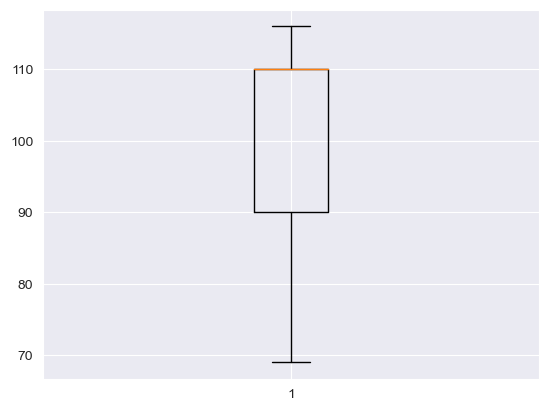

In [100]:
HP = plt.boxplot(car1.HP)
plt.show()

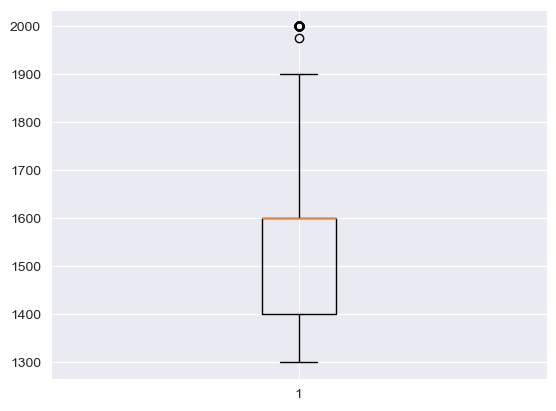

In [101]:
CC = plt.boxplot(car1.cc)
plt.show()

In [102]:
[item.get_ydata() for item in CC ['fliers']]

[array([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
        2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
        2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
        2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
        2000, 2000, 2000, 2000, 1975, 2000, 2000, 2000, 2000, 2000, 2000,
        2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
        2000, 2000, 2000, 2000, 2000], dtype=int64)]

In [103]:
[item.get_ydata()[1] for item in CC ['whiskers']]

[1300.0, 1900.0]

In [104]:
car1 = car1[car1.cc<=1900]
car1

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight
9,12950,23,71138,69,1900,3,5,185,1105
18,16750,24,25563,110,1600,3,5,19,1065
19,16950,30,64359,110,1600,3,5,85,1105
20,15950,30,67660,110,1600,3,5,85,1105
21,16950,29,43905,110,1600,3,5,100,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


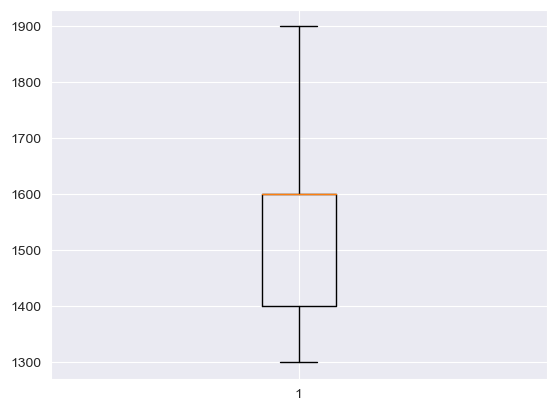

In [105]:
plt.boxplot(car1.cc)
plt.show()

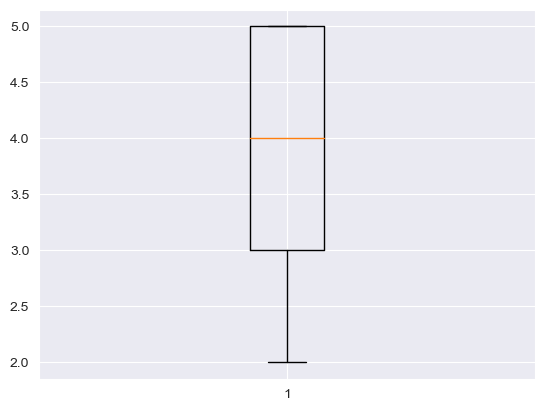

In [106]:
Doors = plt.boxplot(car1.Doors)
plt.show()

In [107]:
[item.get_ydata() for item in Doors ['fliers']]

[array([], dtype=int64)]

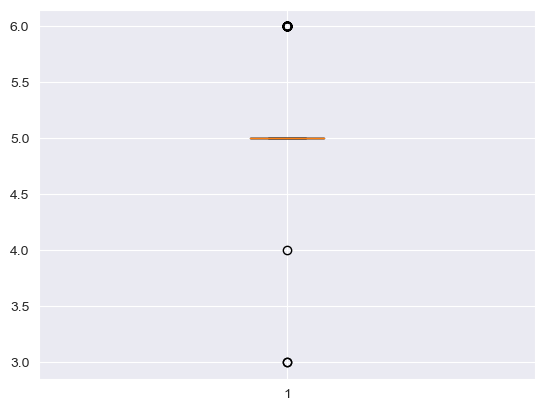

In [108]:
Gears = plt.boxplot(car1.Gears)
plt.show()

In [109]:
[item.get_ydata() for item in Gears ['fliers']]

[array([3, 3, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], dtype=int64)]

In [110]:
[item.get_ydata()[1] for item in Gears ['whiskers']]

[5.0, 5.0]

In [111]:
car1 = car1[car1.Gears>=5]
car1

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight
9,12950,23,71138,69,1900,3,5,185,1105
18,16750,24,25563,110,1600,3,5,19,1065
19,16950,30,64359,110,1600,3,5,85,1105
20,15950,30,67660,110,1600,3,5,85,1105
21,16950,29,43905,110,1600,3,5,100,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [112]:
car1 = car1[car1.Gears<=5]
car1

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight
9,12950,23,71138,69,1900,3,5,185,1105
18,16750,24,25563,110,1600,3,5,19,1065
19,16950,30,64359,110,1600,3,5,85,1105
20,15950,30,67660,110,1600,3,5,85,1105
21,16950,29,43905,110,1600,3,5,100,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


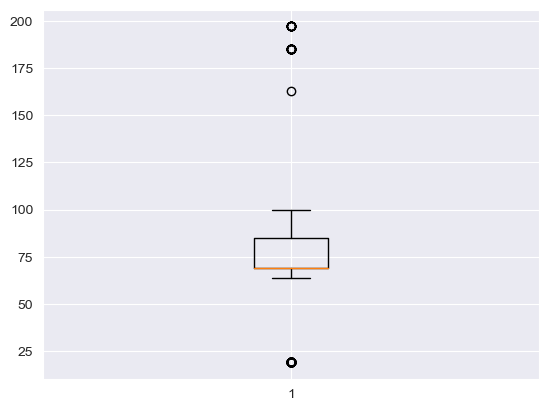

In [113]:
Qtax = plt.boxplot(car1.Qtax)
plt.show()

In [114]:
[item.get_ydata()[1] for item in Qtax ['whiskers']]

[64.0, 100.0]

In [115]:
[item.get_ydata() for item in Qtax ['fliers']]

[array([ 19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,
         19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,
         19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,
         19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,
         19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19, 185, 185,
        185, 185, 197, 185, 185, 197, 185, 185, 163, 197, 185, 185, 197,
        185, 197, 185, 185, 185, 185, 185, 185, 197, 185, 185, 185, 185,
        197, 197, 197, 197, 197, 197], dtype=int64)]

In [116]:
car1 = car1[car1.Qtax>=64]
car1

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight
9,12950,23,71138,69,1900,3,5,185,1105
19,16950,30,64359,110,1600,3,5,85,1105
20,15950,30,67660,110,1600,3,5,85,1105
21,16950,29,43905,110,1600,3,5,100,1170
22,15950,28,56349,110,1600,3,5,85,1120
...,...,...,...,...,...,...,...,...,...
1430,8450,80,23000,86,1300,3,5,69,1015
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015


In [117]:
car1 = car1[car1.Qtax<=100]
car1

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight
19,16950,30,64359,110,1600,3,5,85,1105
20,15950,30,67660,110,1600,3,5,85,1105
21,16950,29,43905,110,1600,3,5,100,1170
22,15950,28,56349,110,1600,3,5,85,1120
23,16950,28,32220,110,1600,3,5,85,1120
...,...,...,...,...,...,...,...,...,...
1430,8450,80,23000,86,1300,3,5,69,1015
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015


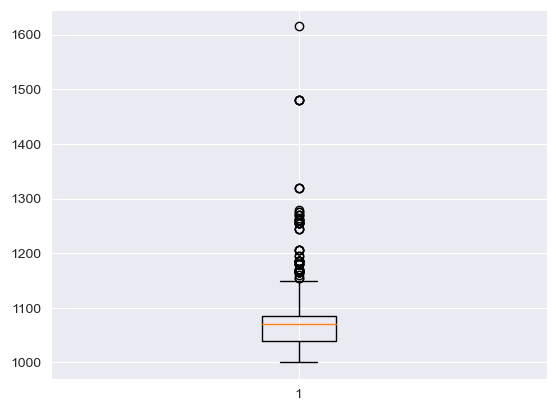

In [121]:
Weight = plt.boxplot(cars.Weight)
plt.show()

In [122]:
[item.get_ydata()[1] for item in Weight ['whiskers']]

[1000.0, 1150.0]

In [123]:
[item.get_ydata() for item in Weight ['fliers']]

[array([1165, 1165, 1165, 1165, 1170, 1170, 1245, 1245, 1185, 1185, 1185,
        1185, 1185, 1185, 1185, 1185, 1170, 1255, 1255, 1270, 1255, 1255,
        1195, 1255, 1180, 1195, 1165, 1180, 1275, 1180, 1180, 1245, 1265,
        1260, 1260, 1260, 1155, 1480, 1480, 1480, 1320, 1320, 1270, 1280,
        1270, 1255, 1275, 1255, 1320, 1185, 1165, 1180, 1160, 1205, 1205,
        1205, 1170, 1615, 1165, 1205, 1165, 1260, 1260, 1155, 1480, 1172],
       dtype=int64)]

In [124]:
car1 = car1[car1.Weight<=1150]
car1

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight
19,16950,30,64359,110,1600,3,5,85,1105
20,15950,30,67660,110,1600,3,5,85,1105
22,15950,28,56349,110,1600,3,5,85,1120
23,16950,28,32220,110,1600,3,5,85,1120
24,16250,29,25813,110,1600,3,5,85,1120
...,...,...,...,...,...,...,...,...,...
1430,8450,80,23000,86,1300,3,5,69,1015
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015


In [125]:
model2 = smf.ols('Price~age+KM+HP+cc+Doors+Gears+Qtax+Weight', data = car1).fit()


In [126]:
model2.params

Intercept    -314.417309
age          -101.292023
KM             -0.013971
HP             47.516730
cc             -4.637805
Doors         -90.379348
Gears       -1572.086545
Qtax           -2.073752
Weight         26.295687
dtype: float64

In [127]:
model2.tvalues, np.round(model2.pvalues,5)

(Intercept    -4.109081
 age         -40.972931
 KM          -10.893123
 HP            6.218330
 cc           -7.357633
 Doors        -2.191414
 Gears        -4.109081
 Qtax         -0.287114
 Weight       11.071697
 dtype: float64,
 Intercept    0.00004
 age          0.00000
 KM           0.00000
 HP           0.00000
 cc           0.00000
 Doors        0.02864
 Gears        0.00004
 Qtax         0.77408
 Weight       0.00000
 dtype: float64)

In [128]:
model2.rsquared, model2.rsquared_adj

(0.8209788134730172, 0.8197954817395998)

In [130]:
#Qtax has the p-value of 0.77, lets try remvoing it and check the model performance 
model3 = smf.ols('Price~age+KM+HP+cc+Doors+Gears+Weight', data = car1).fit()
model3.tvalues, np.round(model3.pvalues,5)

(Intercept    -4.750279
 age         -41.086164
 KM          -10.897307
 HP            6.605519
 cc           -7.791698
 Doors        -2.481533
 Gears        -4.750279
 Weight       14.401162
 dtype: float64,
 Intercept    0.00000
 age          0.00000
 KM           0.00000
 HP           0.00000
 cc           0.00000
 Doors        0.01324
 Gears        0.00000
 Weight       0.00000
 dtype: float64)

In [131]:
model3.rsquared, model3.rsquared_adj

(0.820964878188864, 0.8199514718389896)

In [132]:
# as we see that after removing the Qtax the adjusted r-squared value went up a little, lets try building SLR on Qtax to see its significances


In [133]:
SLR_Qtax = smf.ols('Price~Qtax', data = car1).fit()
SLR_Qtax.tvalues, np.round(SLR_Qtax.pvalues,5)
# as we can see that the variable seems to significant so we cannot drop it yet, there might be some more outliers present in the data, that we are going to findout using differeny methiods

(Intercept     1.999911
 Qtax         14.389890
 dtype: float64,
 Intercept    0.04576
 Qtax         0.00000
 dtype: float64)

In [134]:
SLR_Qtax.rsquared

0.16278121352242303

In [135]:
#Hence will consider the Model2 as our model to move forward with as each variable seems to significant
#Calculating VIF 
#Lets try to find out row wise outliers to improve model performance 

In [136]:
#VIF
rsq_age = smf.ols('age~KM+HP+cc+Doors+Gears+Qtax+Weight', data=car1).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_KM = smf.ols('KM~age+HP+cc+Doors+Gears+Qtax+Weight', data=car1).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~age+KM+cc+Doors+Gears+Qtax+Weight', data=car1).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_cc = smf.ols('cc~age+KM+HP+Doors+Gears+Qtax+Weight', data=car1).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_Doors = smf.ols('Doors~age+KM+HP+cc+Gears+Qtax+Weight', data=car1).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~age+KM+HP+cc+Doors+Qtax+Weight', data=car1).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

rsq_Qtax = smf.ols('Qtax~age+KM+HP+cc+Doors+Gears+Weight', data=car1).fit().rsquared
vif_Qtax = 1/(1-rsq_Qtax)

rsq_Weight = smf.ols('Weight~age+KM+HP+cc+Doors+Gears+Qtax', data=car1).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)

d1 = {'variables':['age','KM','HP','cc','Doors','Gears','Qtax','Weight'], 'VIF':[vif_age, vif_KM, vif_HP, vif_cc, vif_Doors, vif_Gears, vif_Qtax, vif_Weight]}
vif_df = pd.DataFrame(d1)
vif_df

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,age,1.598130
1,KM,1.370589
2,HP,6.809411
3,cc,7.592944
4,Doors,1.747377
5,Gears,0.000000
6,Qtax,3.829001
7,Weight,4.418082


In [120]:
#No variable has VIF greater than 20, so no collinearity hence we can consider all the variables in the regression equation.

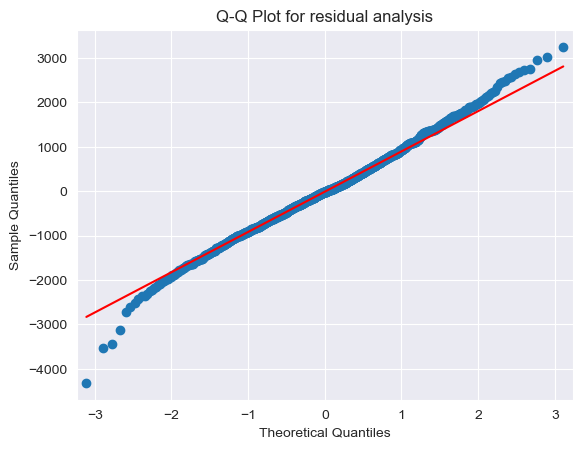

In [137]:
import statsmodels.api as sm
QQplot = sm.qqplot(model2.resid, line='q')
plt.title('Q-Q Plot for residual analysis')
plt.show()

In [138]:
list(np.where(model2.resid<-3000))

[array([  57,  220,  991, 1020], dtype=int64)]

In [139]:
#Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residule values)
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

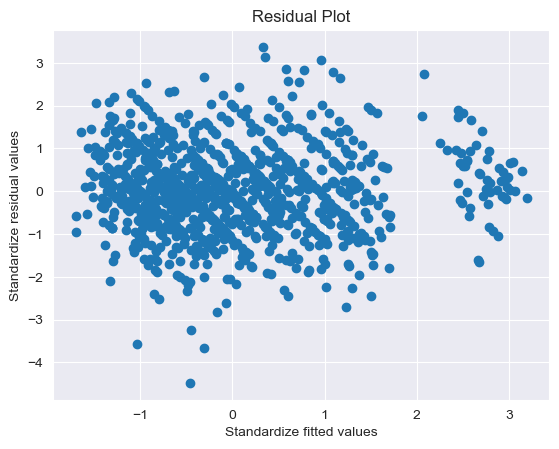

In [140]:
plt.scatter(get_standardized_values(model2.fittedvalues), get_standardized_values(model2.resid))
plt.title('Residual Plot')
plt.xlabel('Standardize fitted values')
plt.ylabel('Standardize residual values')
plt.show()

In [141]:
#Residual Vs regressors 

eval_env: 1


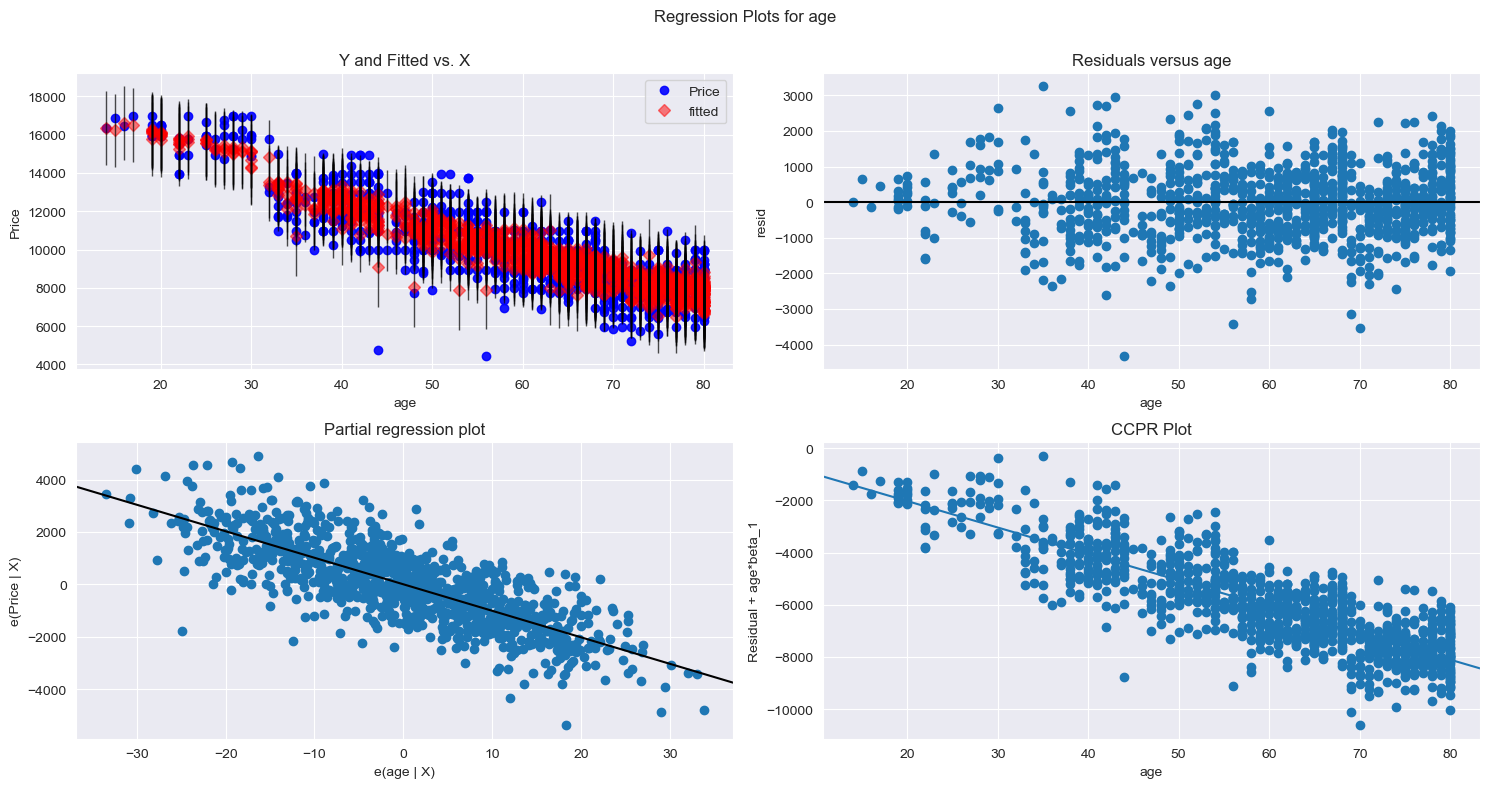

In [142]:
#Age 
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2,"age", fig=fig)
plt.show()

eval_env: 1


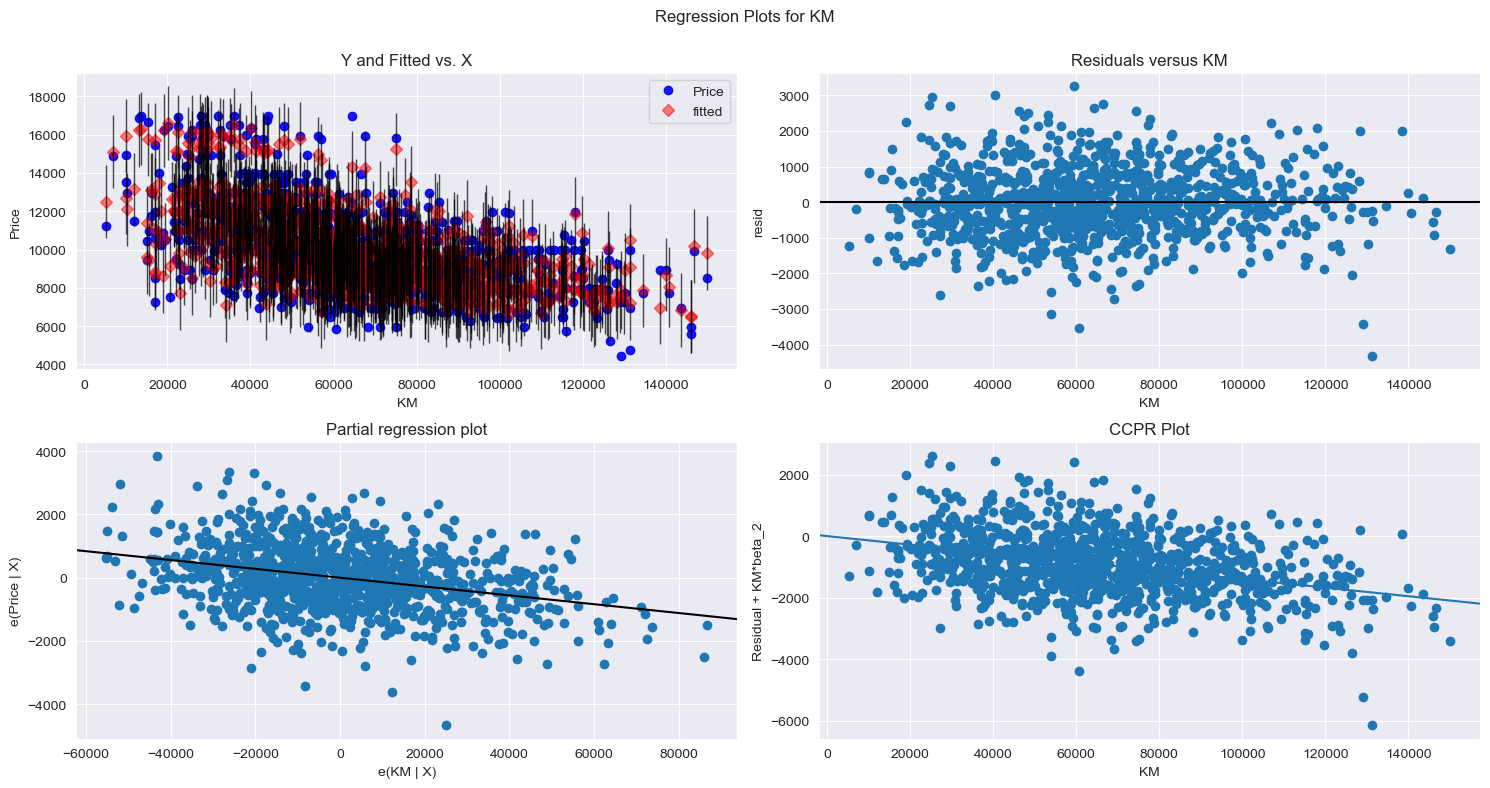

In [143]:
#KM
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2,"KM", fig=fig)
plt.show()

eval_env: 1


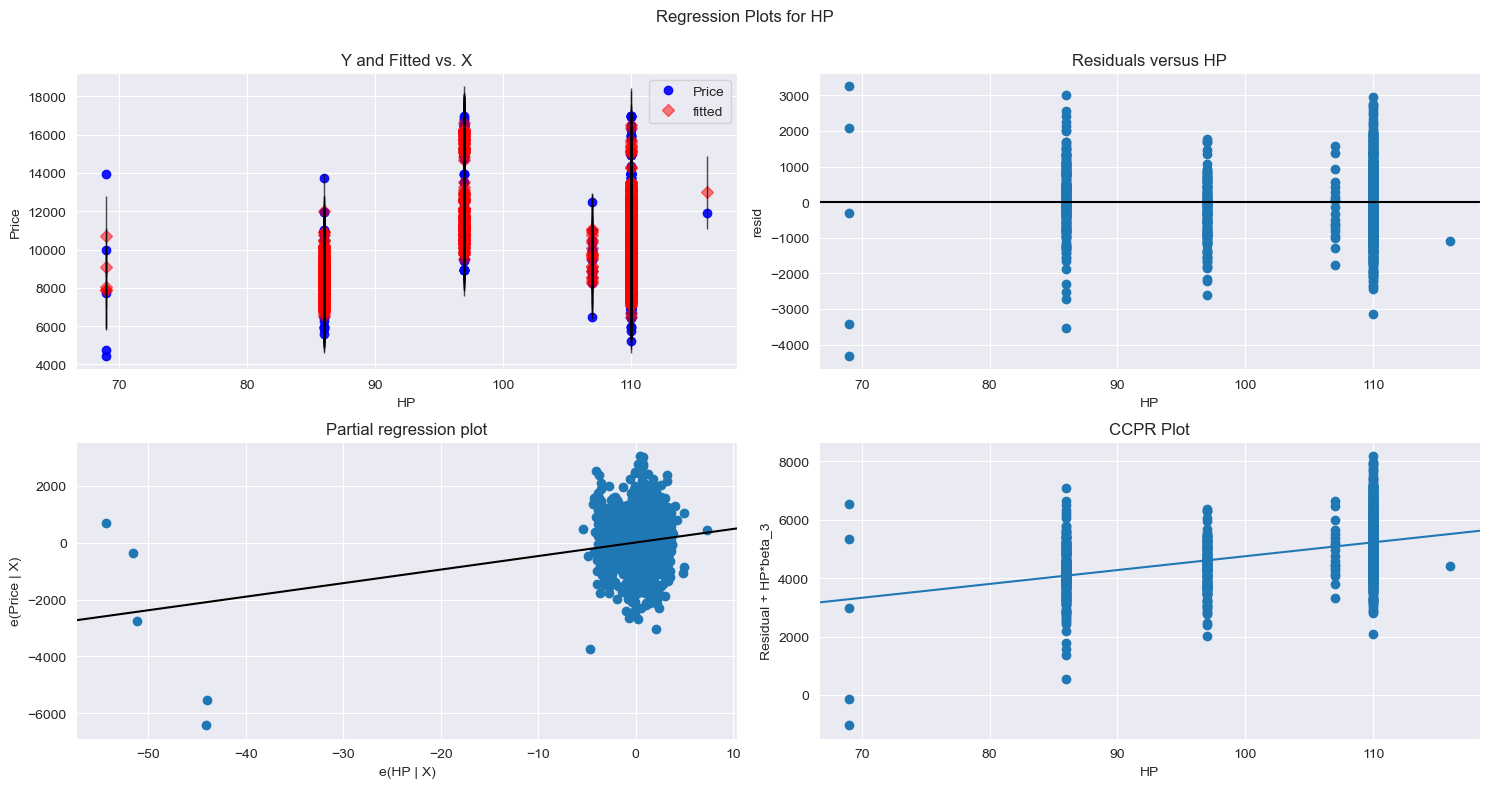

In [144]:
#HP
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2,"HP", fig=fig)
plt.show()

eval_env: 1


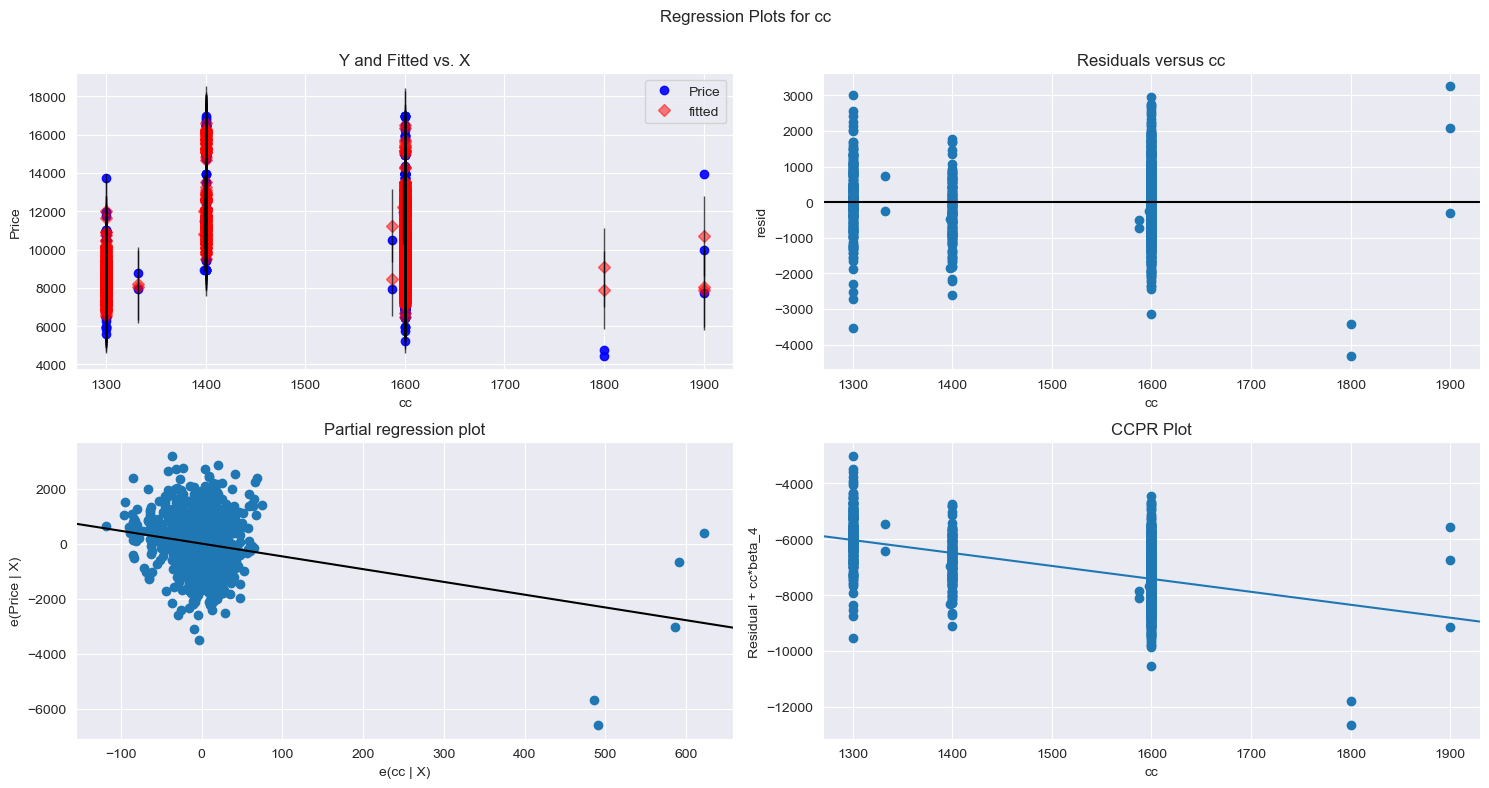

In [145]:
#cc
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2,"cc", fig=fig)
plt.show()

eval_env: 1


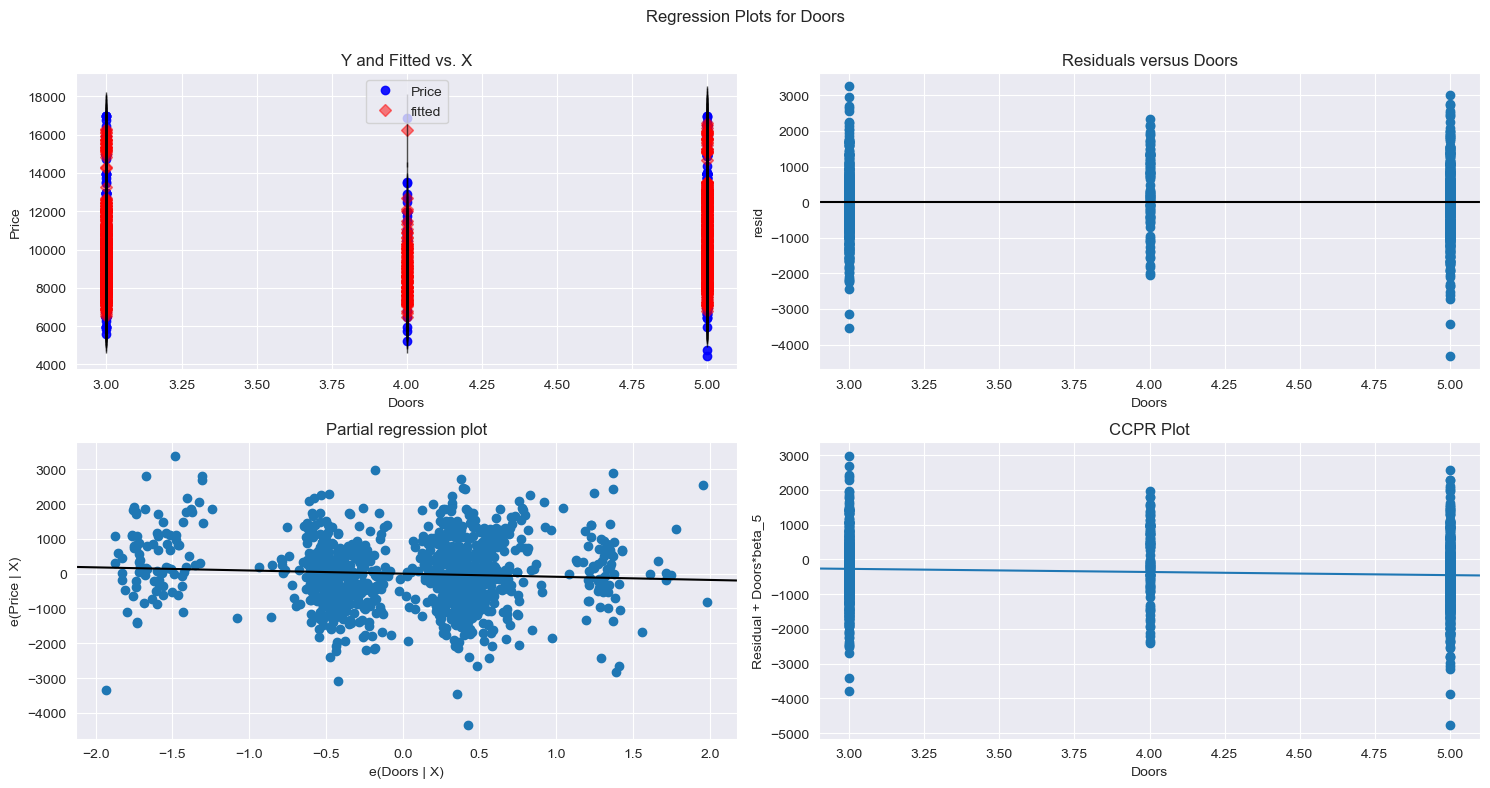

In [146]:
#Doors
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2,"Doors", fig=fig)
plt.show()

eval_env: 1


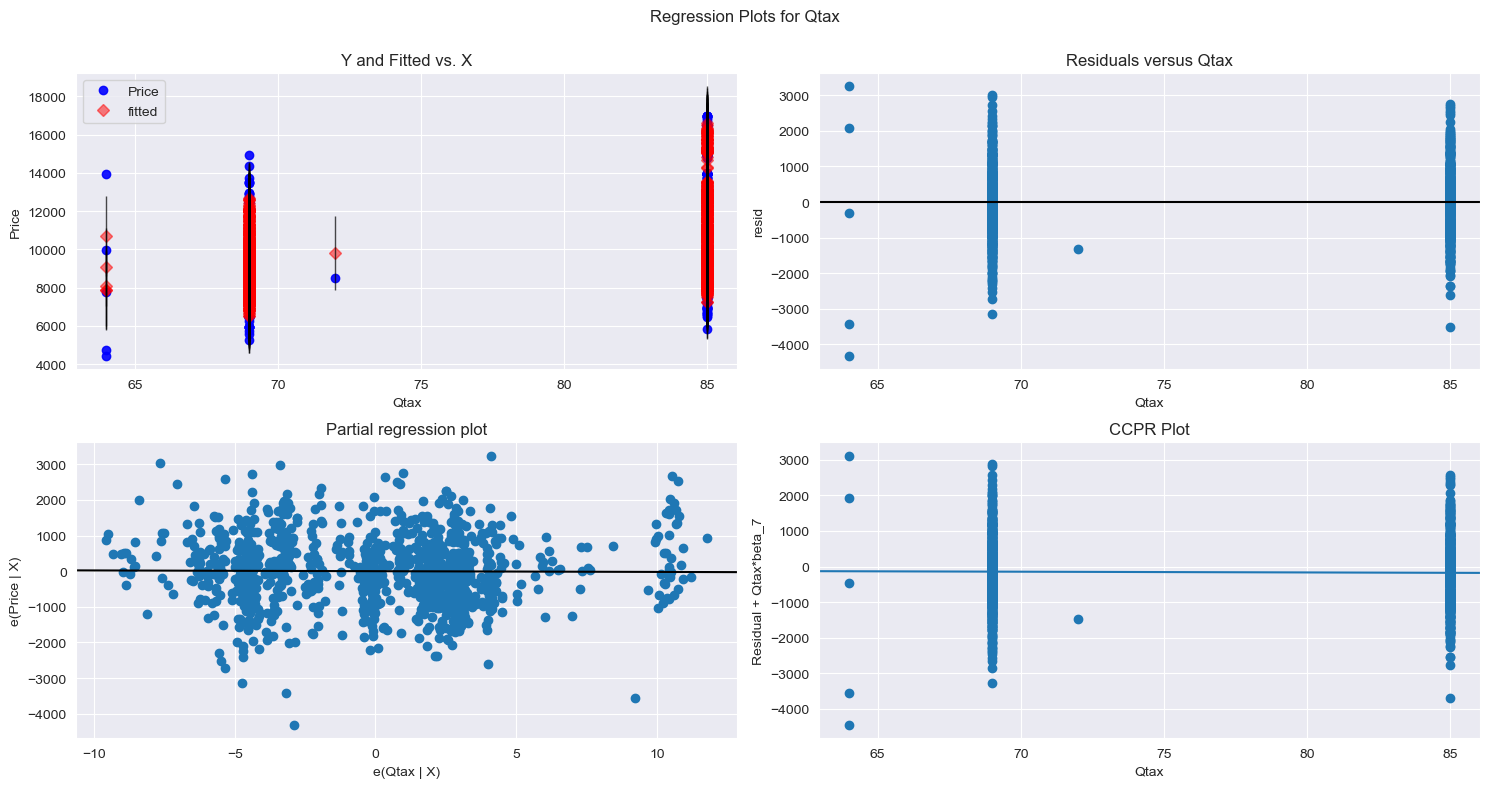

In [147]:
#Qtax
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2,"Qtax", fig=fig)
plt.show()

eval_env: 1


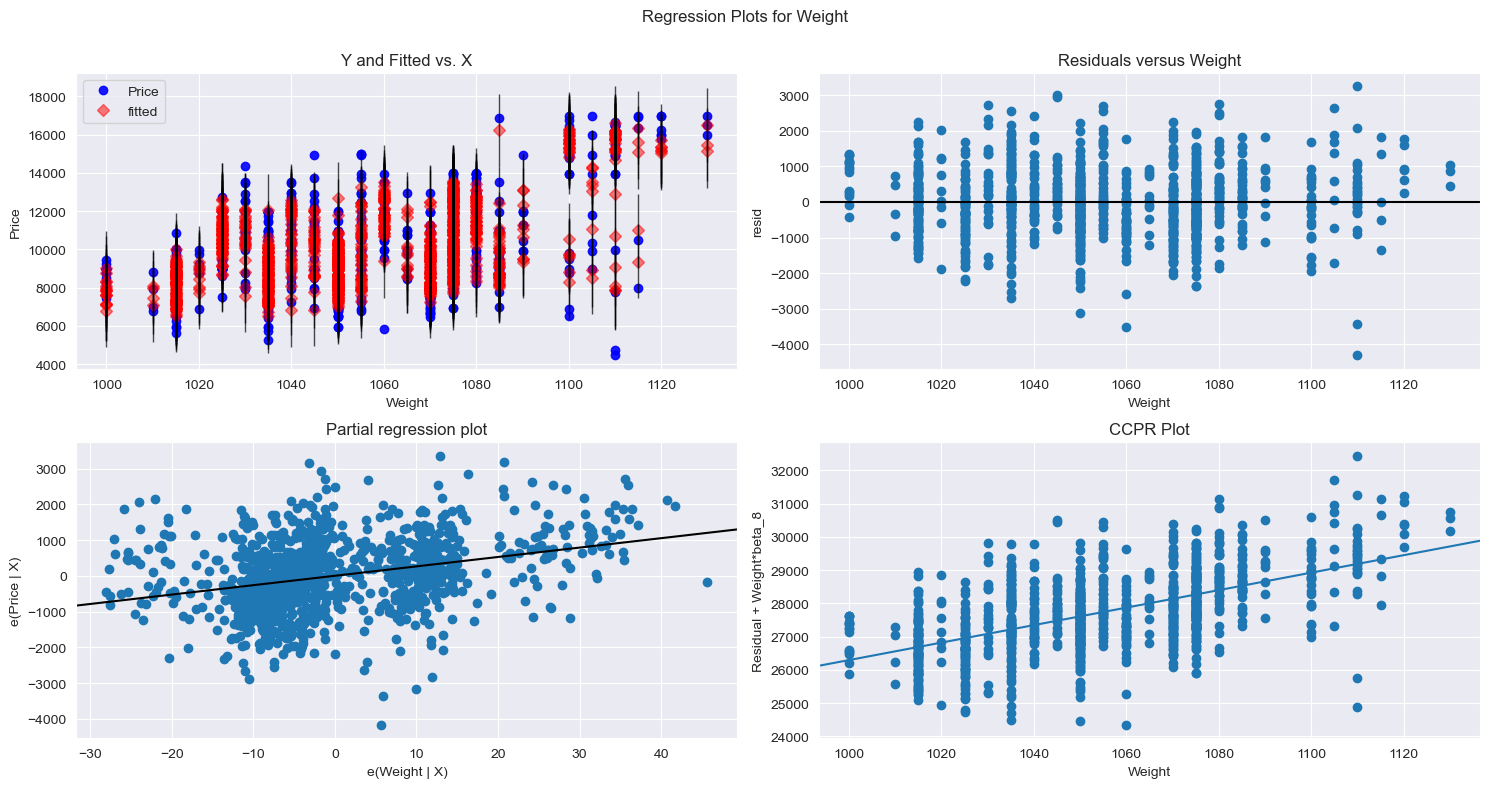

In [148]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2,"Weight", fig=fig)
plt.show()

In [149]:
#Model deletion Dignostics
model2_influence = model2.get_influence()
(c,_) = model2_influence.cooks_distance

In [150]:
#plotting the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toco1)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

NameError: name 'toco1' is not defined

In [ ]:
#index and values of influencers where c is more than 0.5
(np.argmax(c), np.max(c))

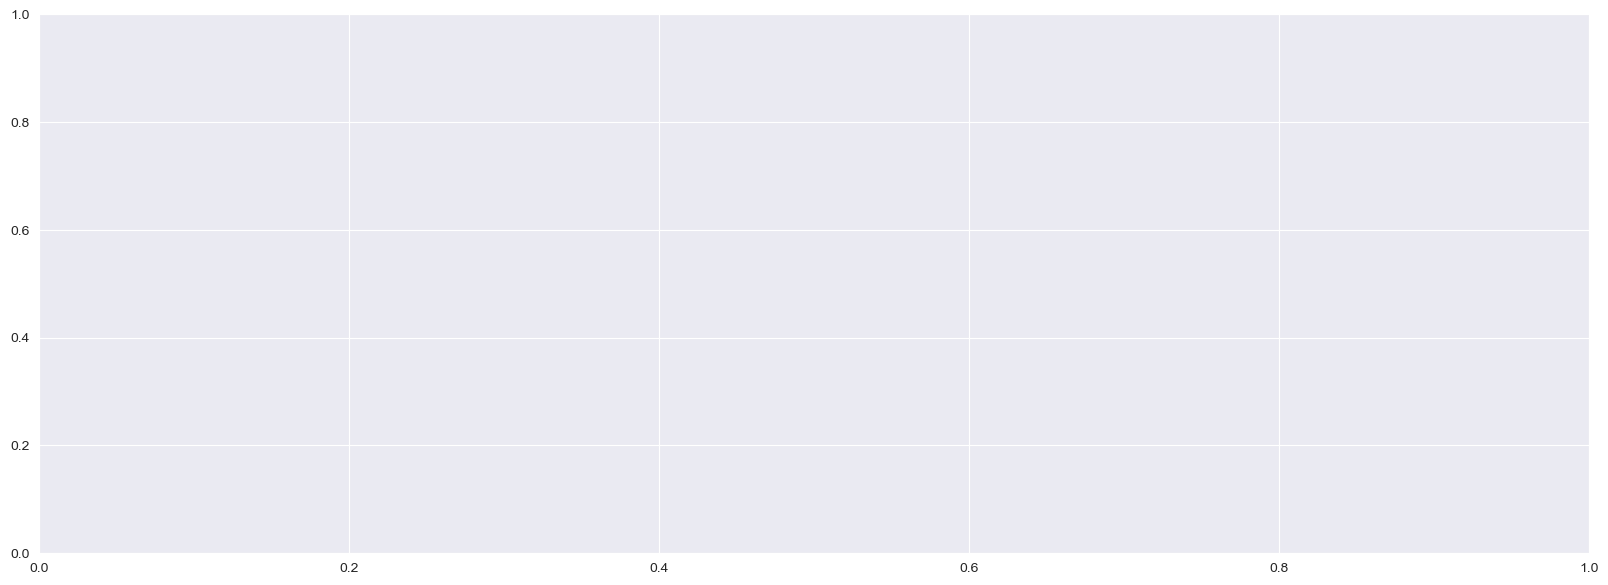

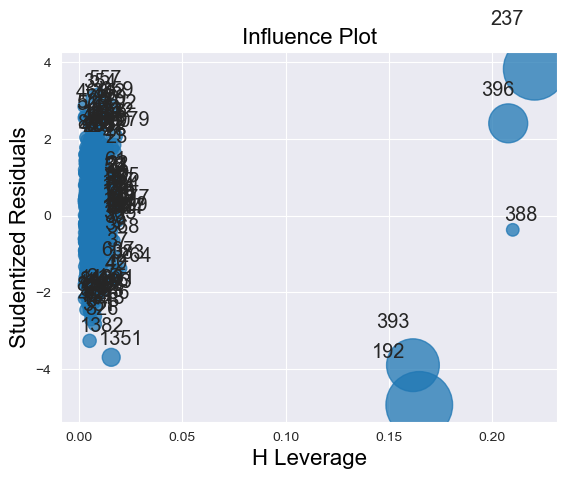

In [151]:
# High Influence points 
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model2)
plt.show()

In [153]:
# leverage cutoff value = 3*(k+1)/n; k = number of features and n = no, of data points 
k = car1.shape[1]
n = car1.shape[0]
leverage_cutoff = 3*(k+1)/n
leverage_cutoff

0.028116213683223992

In [154]:
car1[car1.index.isin([57, 237, 396, 388, 393, 192])]

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight
57,15250,26,43000,97,1400,5,5,85,1110
192,4750,44,131273,69,1800,5,5,64,1110
237,13950,35,59500,69,1900,3,5,64,1110
388,7750,48,140700,69,1900,5,5,64,1110
393,4450,56,129155,69,1800,5,5,64,1110
396,9950,53,117913,69,1900,5,5,64,1110


In [155]:
car1.head(50)

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight
19,16950,30,64359,110,1600,3,5,85,1105
20,15950,30,67660,110,1600,3,5,85,1105
22,15950,28,56349,110,1600,3,5,85,1120
23,16950,28,32220,110,1600,3,5,85,1120
24,16250,29,25813,110,1600,3,5,85,1120
25,15950,25,28450,110,1600,3,5,85,1120
27,15750,29,41415,110,1600,3,5,85,1120
28,16950,28,44142,110,1600,3,5,85,1120
31,15750,22,35199,97,1400,3,5,85,1100
32,15950,27,29510,97,1400,3,5,85,1100


In [156]:
car2 = car1.drop(car1.index[[57, 237, 396, 388, 393, 192]], axis=0).reset_index()

In [157]:
car2 = car2.drop(['index'], axis=1)

In [158]:
car2

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight
0,16950,30,64359,110,1600,3,5,85,1105
1,15950,30,67660,110,1600,3,5,85,1105
2,15950,28,56349,110,1600,3,5,85,1120
3,16950,28,32220,110,1600,3,5,85,1120
4,16250,29,25813,110,1600,3,5,85,1120
...,...,...,...,...,...,...,...,...,...
1056,8450,80,23000,86,1300,3,5,69,1015
1057,7500,69,20544,86,1300,3,5,69,1025
1058,10845,72,19000,86,1300,3,5,69,1015
1059,8500,71,17016,86,1300,3,5,69,1015


In [159]:
#New model 
final_model = smf.ols('Price~age+KM+HP+cc+Doors+Gears+Qtax+Weight', data = car2).fit()
final_model.rsquared, final_model.rsquared_adj, final_model.aic

(0.8243924720797556, 0.8232250906026031, 17583.99296150897)

In [160]:
model_influence_1 = final_model.get_influence()
(c_1,_) = model_influence_1.cooks_distance

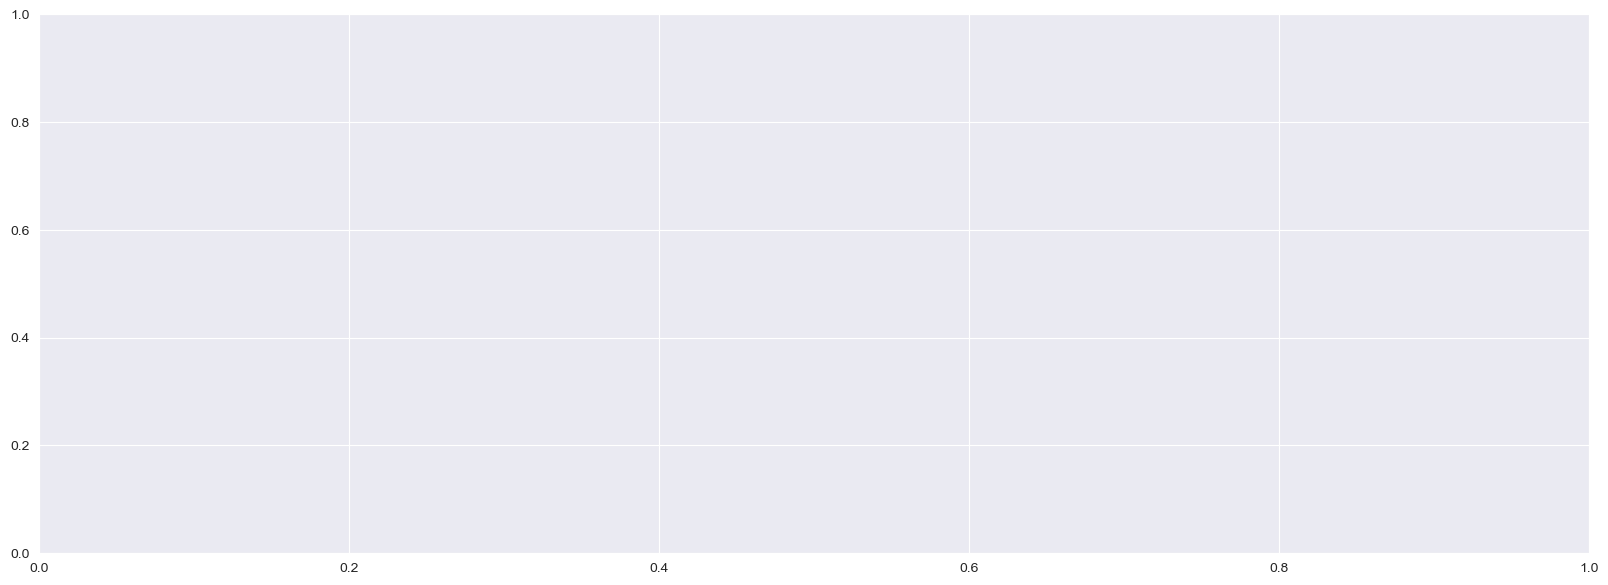

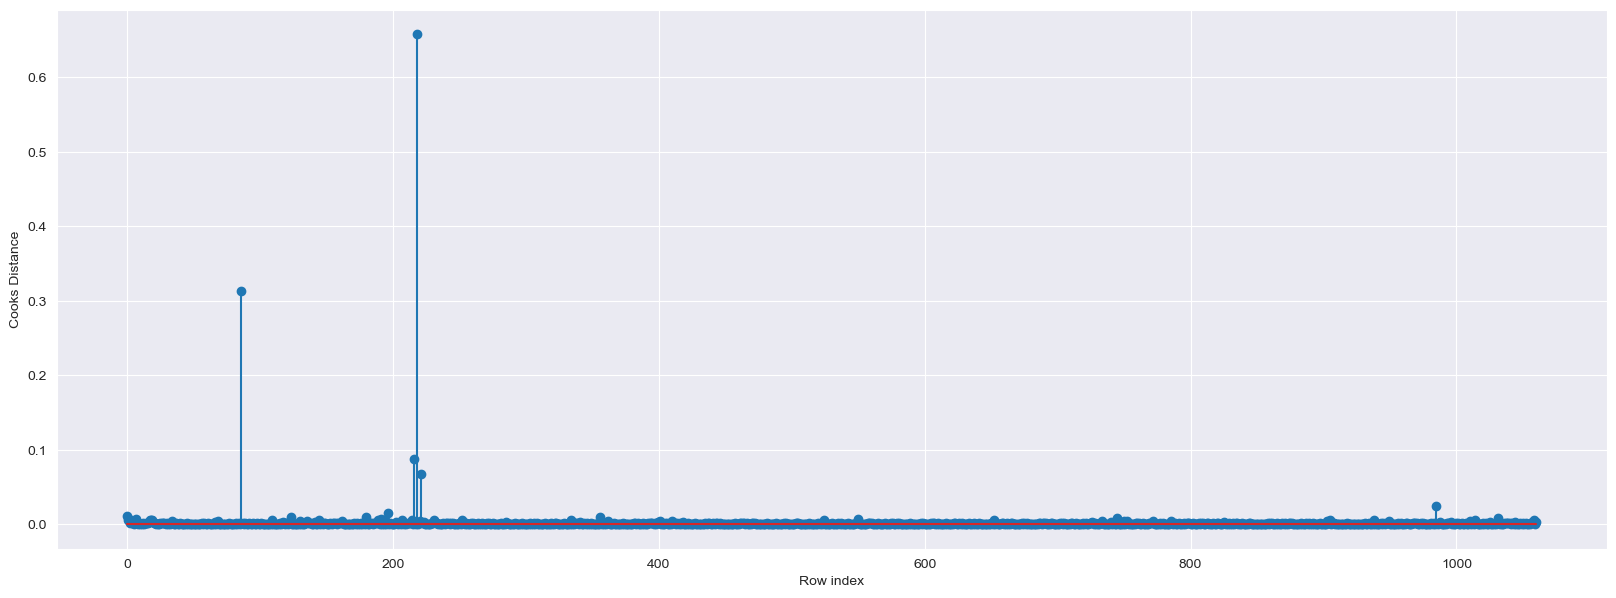

In [162]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car2)),np.round(c_1,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');
plt.show()

In [163]:
(np.argmax(c_1), np.max(c_1))

(218, 0.657670773424385)

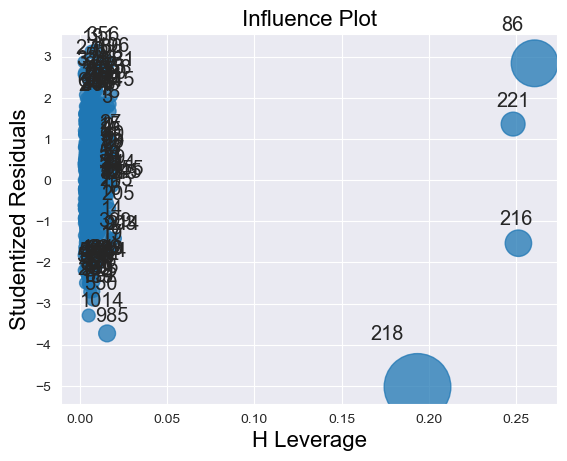

In [164]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_model)
plt.show()

In [165]:
car3 = car2.drop(car2.index[[218,216,221,86]], axis=0).reset_index()

In [166]:
car3 = car3.drop(['index'], axis=1)

In [167]:
car3

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight
0,16950,30,64359,110,1600,3,5,85,1105
1,15950,30,67660,110,1600,3,5,85,1105
2,15950,28,56349,110,1600,3,5,85,1120
3,16950,28,32220,110,1600,3,5,85,1120
4,16250,29,25813,110,1600,3,5,85,1120
...,...,...,...,...,...,...,...,...,...
1052,8450,80,23000,86,1300,3,5,69,1015
1053,7500,69,20544,86,1300,3,5,69,1025
1054,10845,72,19000,86,1300,3,5,69,1015
1055,8500,71,17016,86,1300,3,5,69,1015


In [168]:
final_model_2 = smf.ols('Price~age+KM+HP+cc+Doors+Gears+Qtax+Weight', data = car3).fit()
final_model_2.rsquared, final_model_2.rsquared_adj, final_model_2.aic

(0.8294866404909016, 0.8283488011042822, 17480.664088369518)

In [169]:
model_influence_2 = final_model_2.get_influence()
(c_2,_) = model_influence_2.cooks_distance

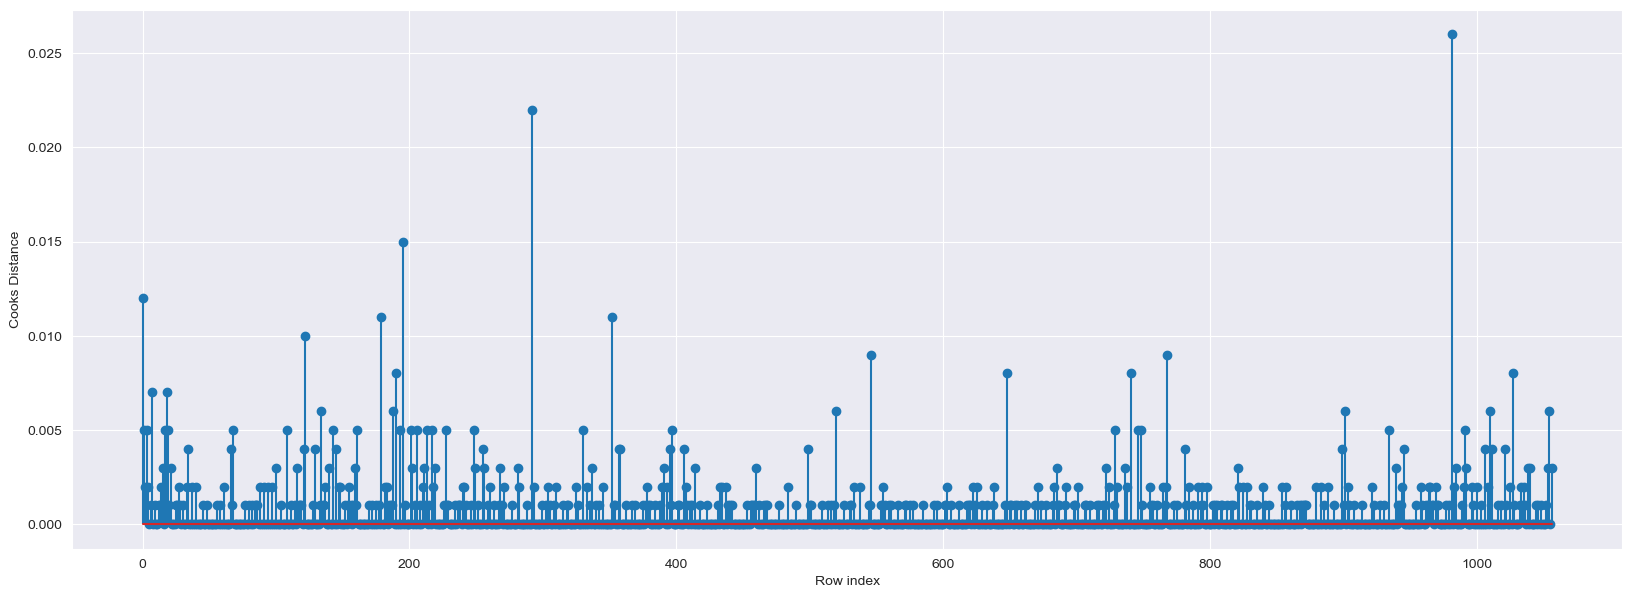

In [170]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car3)),np.round(c_2,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');
plt.show()

In [171]:
(np.argmax(c_2), np.max(c_2))

(981, 0.02623651659978074)

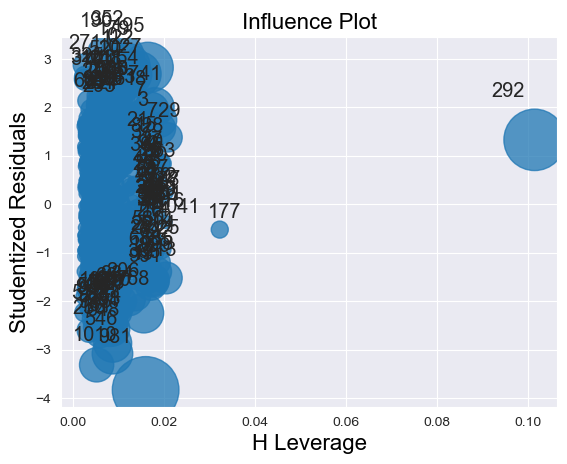

In [173]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_model_2)
plt.show()

In [174]:
car4 = car3.drop(car3.index[[177,292]], axis=0).reset_index()

In [175]:
car4 = car4.drop(['index'], axis=1)

In [176]:
car4

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight
0,16950,30,64359,110,1600,3,5,85,1105
1,15950,30,67660,110,1600,3,5,85,1105
2,15950,28,56349,110,1600,3,5,85,1120
3,16950,28,32220,110,1600,3,5,85,1120
4,16250,29,25813,110,1600,3,5,85,1120
...,...,...,...,...,...,...,...,...,...
1050,8450,80,23000,86,1300,3,5,69,1015
1051,7500,69,20544,86,1300,3,5,69,1025
1052,10845,72,19000,86,1300,3,5,69,1015
1053,8500,71,17016,86,1300,3,5,69,1015


In [177]:
final_model_3 = smf.ols('Price~age+KM+HP+cc+Doors+Gears+Qtax+Weight', data = car4).fit()
final_model_3.rsquared, final_model_3.rsquared_adj, final_model_3.aic

(0.829600836212021, 0.8284615867884146, 17447.63446304899)

In [178]:
model_influence_3 = final_model_3.get_influence()
(c_3,_) = model_influence_3.cooks_distance

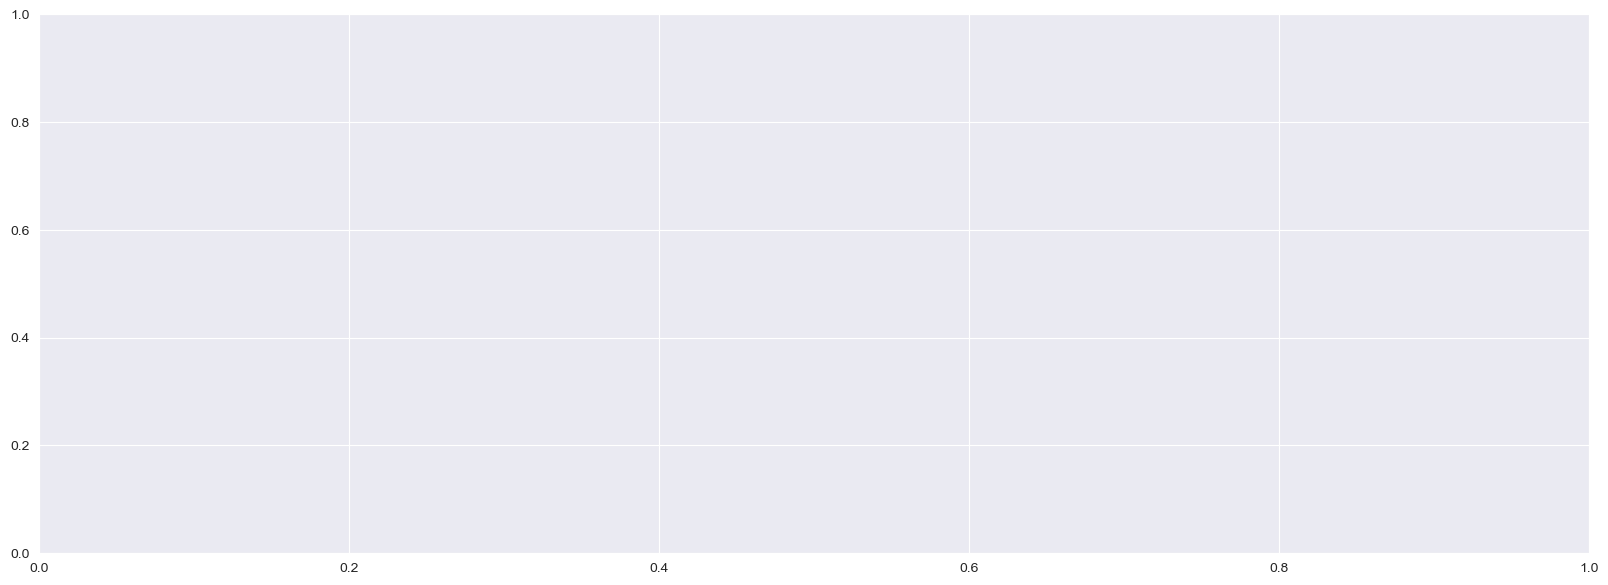

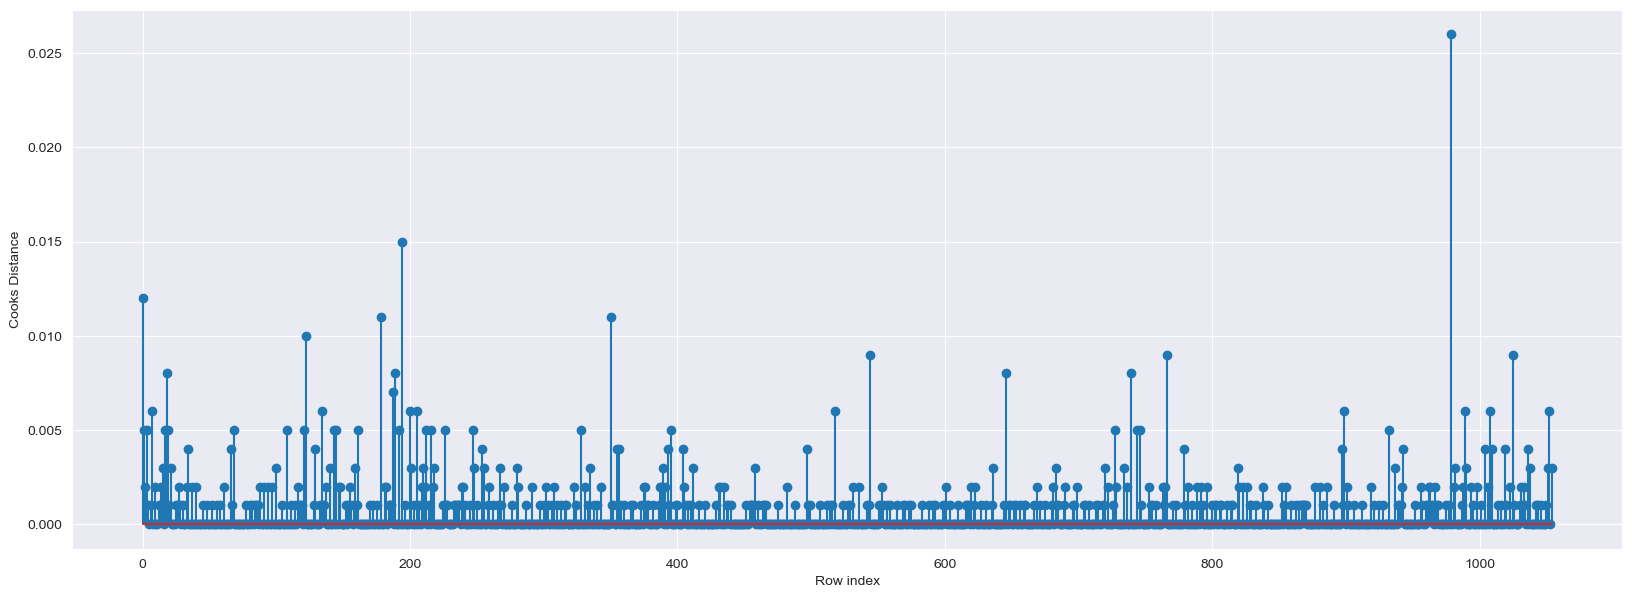

In [180]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_3,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');
plt.show()

In [181]:
(np.argmax(c_3),np.max(c_3))

(979, 0.026299323692295887)

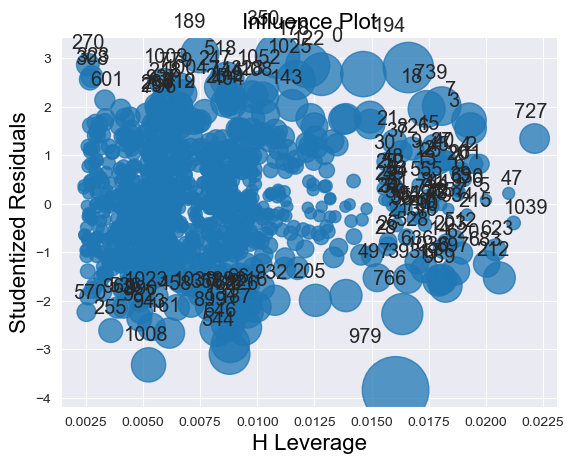

In [182]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_model_3)
plt.show()

In [183]:
# now we predict the results using above 


In [184]:
y_pred = final_model_3.predict(car4)
y_pred

0       14459.829508
1       14415.968653
2       15183.274859
3       15503.880306
4       15482.317755
            ...     
1050     7707.606666
1051     9182.951720
1052     8614.301388
1053     8747.356347
1054     8855.378331
Length: 1055, dtype: float64

In [186]:
dataframe = {'Models':['final_model','final_model_2', 'final_model_3'], 'R_square_value':[final_model.rsquared,final_model_2.rsquared, final_model_3.rsquared], 'AIC':[final_model.aic,final_model_2.aic, final_model_3.aic]}

In [187]:
table = pd.DataFrame(dataframe)
table

,Models,R_square_value,AIC
0,final_model,0.824392,17583.992962
1,final_model_2,0.829487,17480.664088
2,final_model_3,0.829601,17447.634463
